# EDA_S 
File Ipynb yang berisi EDA dan pelatihan Model pada Data Statis

# Daftar Isi

1. [Import Library and Dependency](#IMPORTLIBRARY)
2. [Extract Raw Landmark](#EXTRACT-RAW-LANDMARK)
3. [Combined Dataset](#COMBINED-DATASET-I)
4. [Fungsi Normalisasi](#FUNGSI-NORMALISASI)
5. [File And Folder](#FILE-AND-FOLDER-EXPLAINED)
6. [Drop Kolom Tertentu](#DROP-KOLOM-TERTENTU)
7. [Preprocessing Data pada CSV](#PREPROCESSING-DATA-PADA-CSV)
8. [Extract Data with Normalisation](#EXTRACT-DATA-WITH-NORMALISATION)
9. [Import Library to Create Model Architecture](#IMPORT-LIBRARY-TO-CREATE-MODEL-ARCHITECTURE)
10. [Split Data](#SPLIT-DATA)
11. [Create Label Map untuk Implementasi Nanti dan Save to PKL and Load](#CREATE-LABEL-MAP-UNTUK-IMPLEMENTASI-NANTI-DAN-SAVE-TO-PKL-AND-LOAD)
12. [Encoded and to Categori Label](#ENCODED-AND-TO-CATEGORI-LABEL)
13. [Transform DataFrame Pandas CSV to Numpy Array](#TRANSFORM-DATAFRAME-PANDAS-CSV-TO-NUMPY-ARRAY)


# IMPORT LIBRARY

In [2]:
import os
import pandas as pd
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import tensorflow as tf0

import pandas as pd

2025-06-27 23:46:45.521684: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-27 23:46:45.538160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751042805.557541    9106 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751042805.563358    9106 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751042805.578265    9106 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [65]:
240*46

11040

In [6]:
pd.read_csv('csv/static/pure.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
11036,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
11037,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
11038,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


Jumlah total sampel: 9600
Jumlah total fitur (termasuk label dan sample_num): 65
Nama kolom: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Z18', 'Z19', 'Z20', 'Sample Num', 'Label']

Distribusi jumlah sampel per label:
Label
g             240
c             240
percaya       240
space         240
y             240
u             240
cepat1        240
r             240
a             240
v             240
e             240
k             240
tidak1        240
f             240
l             240
i             240
6             240
lihat1        240
delete_all    240
9             240
x             240
d             240
s             240
h             2

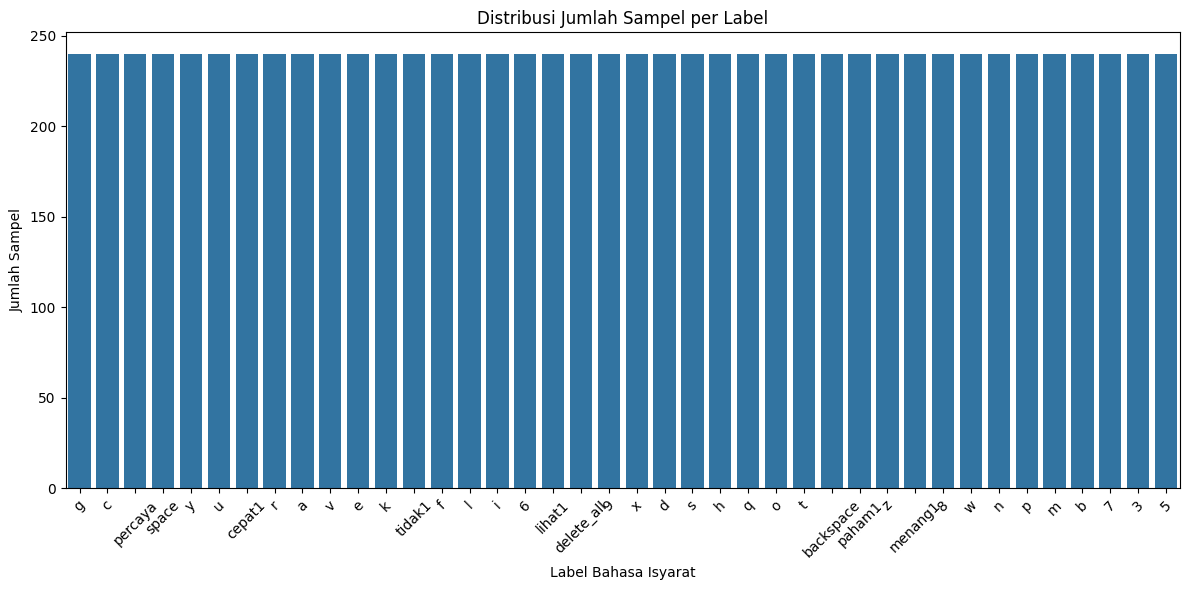

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca dataset
df = pd.read_csv('csv/static/pure2.csv')

# 2. Tampilkan jumlah total sampel dan jumlah kolom (fitur)
print("Jumlah total sampel:", df.shape[0])
print("Jumlah total fitur (termasuk label dan sample_num):", df.shape[1])
print("Nama kolom:", df.columns.tolist())

# 3. Distribusi jumlah sampel per label
print("\nDistribusi jumlah sampel per label:")
print(df['Label'].value_counts())

# 4. Contoh 5 baris pertama dari dataset
print("\nContoh data:")
print(df.head())

# 5. Statistik deskriptif dari fitur (hanya numerik)
print("\nStatistik deskriptif:")
print(df.describe())

# 6. Visualisasi distribusi label (Bar Chart)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.title('Distribusi Jumlah Sampel per Label')
plt.xlabel('Label Bahasa Isyarat')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
11036,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
11037,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
11038,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [7]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [11]:
folders=list('uv')
data = []
for target in folders:
    
    data_separated =[]
    image_directory = path+"/"+target
    img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0]))[150:] 
    print(img_path)

['151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '170.jpg']
['151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '170.jpg']


In [2]:
path = 'img'

# Data untuk DataFrame
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and not f.startswith('.')]
folders

['g',
 'c',
 'h',
 'q',
 'o',
 'paham2',
 't',
 'backspace',
 'paham1',
 '10_2',
 'z',
 'cepat2',
 's',
 'menang1',
 'w',
 'n',
 'p',
 'm',
 'b',
 'd',
 'x',
 'menang2',
 'lihat2',
 'percaya',
 'space',
 'y',
 'j2',
 'u',
 'cepat1',
 'r',
 'a',
 'v',
 'e',
 'k',
 'tidak1',
 'f',
 'l',
 'i',
 'lihat1',
 'delete_all']

0 == o
4 == b


In [25]:
combined_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
10908,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
10909,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
10910,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [16]:
combined_df['Sample Num'].unique()

array([154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  9

In [10]:
df['Sample Num'].unique()

array([154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 26

In [42]:
pd.read_csv(f'csv_separated/static/space/pure.csv')['Sample Num']

0        1
1        2
2        3
3        4
4        5
      ... 
237    236
238    237
239    238
240    239
241    240
Name: Sample Num, Length: 242, dtype: int64

In [43]:
import pandas as pd

# Baca CSV
df = pd.read_csv('csv_separated/static/space/pure.csv')

# Hitung jumlah kemunculan setiap nilai pada kolom 'Sample Num'
counts = df['Sample Num'].value_counts()

# Ambil hanya yang jumlahnya lebih dari 1
filtered = counts[counts > 1]

# Cetak hasilnya
print(filtered)


Sample Num
35    2
36    2
Name: count, dtype: int64


## EXTRACT RAW LANDMARK

In [60]:
import os
import pandas as pd
import mediapipe as mpfil
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

# Direktori gambar


# Inisialisasi MediaPipe HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)
max_images = 38
path = 'img'
last_data=0
last_a=888
# Data untuk DataFrame
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and not f.startswith('.')]
folders=['tidak1']
data = []
for target in folders:
   
    # last_data=pd.read_csv(f'csv_separated/static/{target}/pure.csv').shape[0]
    data_separated =[]
    image_directory = path+"/"+target
    # img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0])) [last_data:] 
    img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0]))
    a=1+last_data
    # img_path = [sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0])) ]
    for img in img_path:
        image_path = os.path.join(image_directory, img)
        print(image_path ,'---',a)
        image = cv2.imread(image_path )
        
        if image is None:
            print(f"Gagal membuka {image_path } i")
            continue
        
    
        # Konversi ke RGB untuk MediaPipe
        frame_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    
        # Deteksi tangan
        detection_result = detector.detect(mp_image)
        if not detection_result.hand_landmarks:
            print(f"Tidak ada tangan terdeteksi dalam {image_path } in label {target} ")
            os.remove(image_path)
         
        
        # Format data sesuai permintaan
        for hand_idx, hand in enumerate(detection_result.hand_landmarks):
            if last_a == a:
                sos = f'{a } sama vvv'
            last_a = a
     
            x_coords  = np.array([landmark.x for landmark in hand])
            y_coords = np.array([landmark.y for landmark in hand])
            z_coords = np.array([landmark.z for landmark in hand])

            row_data = {f"X{idx}": x for idx, x in zip(range(21),x_coords)}
            row_data.update({f"Y{idx}": y for idx, y in zip(range(21),y_coords)})
            row_data.update({f"Z{idx}": z for idx,z in zip(range(21),z_coords)})
            
            
            row_data["Sample Num"] = a
            row_data["Label"] = target
            

            data.append(row_data)
            data_separated.append(row_data)
        if a== 240:
            break
        a+=1
    df3 = pd.DataFrame(data_separated)
    # df2= pd.read_csv(f'csv_separated/static/{target}/pure.csv')
    # df=pd.concat([pd.DataFrame(data_separated),df2], ignore_index=True)
    folder_path = f'csv_separated/static/{target}'

# Buat folder jika belum ada
    os.makedirs(folder_path, exist_ok=True)

    # Simpan DataFrame ke CSV
    df3.to_csv(f'{folder_path}/pure.csv', index=False)
    print('next')
df = pd.DataFrame(data)
print('selesai')

I0000 00:00:1748536467.360542    8326 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748536467.362396   35649 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1748536467.381807   35656 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748536467.395713   35661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


img/tidak1/1.jpg --- 1
img/tidak1/2.jpg --- 2
img/tidak1/3.jpg --- 3
img/tidak1/4.jpg --- 4
img/tidak1/5.jpg --- 5
img/tidak1/6.jpg --- 6
img/tidak1/7.jpg --- 7
img/tidak1/8.jpg --- 8
img/tidak1/9.jpg --- 9
img/tidak1/10.jpg --- 10
img/tidak1/11.jpg --- 11
img/tidak1/12.jpg --- 12
img/tidak1/13.jpg --- 13
img/tidak1/14.jpg --- 14
img/tidak1/15.jpg --- 15
img/tidak1/16.jpg --- 16
img/tidak1/17.jpg --- 17
img/tidak1/18.jpg --- 18
img/tidak1/19.jpg --- 19
img/tidak1/20.jpg --- 20
img/tidak1/21.jpg --- 21
img/tidak1/22.jpg --- 22
img/tidak1/23.jpg --- 23
img/tidak1/24.jpg --- 24
img/tidak1/25.jpg --- 25
img/tidak1/26.jpg --- 26
img/tidak1/27.jpg --- 27
img/tidak1/28.jpg --- 28
img/tidak1/29.jpg --- 29
img/tidak1/30.jpg --- 30
img/tidak1/31.jpg --- 31
img/tidak1/32.jpg --- 32
img/tidak1/33.jpg --- 33
img/tidak1/34.jpg --- 34
img/tidak1/35.jpg --- 35
img/tidak1/36.jpg --- 36
img/tidak1/37.jpg --- 37
img/tidak1/38.jpg --- 38
img/tidak1/39.jpg --- 39
img/tidak1/40.jpg --- 40
img/tidak1/41.jpg 

In [52]:
sos

'36 sama'

In [34]:
a

240

In [3]:
pd.read_csv(f'csv_separated/static/b/pure.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.280194,0.344358,0.394846,0.362183,0.305842,0.365472,0.363407,0.358005,0.352079,0.318126,...,-0.080656,-0.112451,-0.137503,-0.156142,-0.084645,-0.106609,-0.118912,-0.130509,1,b
1,0.262559,0.333737,0.388757,0.357821,0.299822,0.359733,0.357653,0.353320,0.349151,0.310124,...,-0.072404,-0.100441,-0.124282,-0.142488,-0.080700,-0.101267,-0.112659,-0.123521,2,b
2,0.251024,0.321641,0.380204,0.359657,0.304788,0.349348,0.345018,0.339574,0.334403,0.299880,...,-0.066188,-0.093631,-0.118978,-0.138309,-0.075289,-0.096534,-0.110083,-0.122561,3,b
3,0.235789,0.314028,0.376534,0.365396,0.310093,0.339903,0.331513,0.320665,0.307667,0.289034,...,-0.057375,-0.082499,-0.107564,-0.126883,-0.069660,-0.089394,-0.102617,-0.114885,4,b
4,0.221707,0.304584,0.370716,0.363224,0.309818,0.328356,0.318365,0.307261,0.292766,0.278414,...,-0.052790,-0.075554,-0.102480,-0.123612,-0.066479,-0.085492,-0.099757,-0.112994,5,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.302417,0.353052,0.391171,0.395191,0.363236,0.390388,0.397699,0.395551,0.389541,0.366929,...,-0.028105,-0.043050,-0.059115,-0.071053,-0.036663,-0.049043,-0.057683,-0.065060,136,b
136,0.305902,0.349654,0.384458,0.372832,0.337189,0.380792,0.383561,0.379768,0.374725,0.353150,...,-0.030295,-0.045234,-0.059701,-0.070771,-0.038220,-0.050771,-0.058084,-0.064581,137,b
137,0.302525,0.344423,0.374472,0.361217,0.329278,0.371945,0.377388,0.376974,0.375906,0.345528,...,-0.020594,-0.032086,-0.044610,-0.053900,-0.027018,-0.036326,-0.042055,-0.046946,138,b
138,0.293300,0.341590,0.374310,0.364414,0.327011,0.369871,0.380406,0.382196,0.383183,0.345103,...,-0.002042,-0.007184,-0.018852,-0.027812,-0.008108,-0.011990,-0.015985,-0.020042,139,b


In [15]:
x2=pd.read_csv(f'csv_separated/static/u/pure.csv')
x2.shape[0]

170

In [91]:
df.to_csv(f'csv/static/uv_filter.csv',index=False)

## COMBINED DATASET I
* Menggabungkan Dataset pada file csv di semua folder yang ada didalam direktori **csv_separated/static** *

In [3]:
# Tentukan path ke folder utama
folder_path = 'csv_separated/static/'
# folder_path = 'csv_separated/angka/'
# Daftar untuk menyimpan DataFrame yang dibaca dari setiap file CSV
dfs = []

# Loop untuk mencari semua file 'pure.csv' dalam subfolder
for root, dirs, files in os.walk(folder_path):
    if 'raw.csv' in files:  # Cek jika ada file 'raw.csv' di folder tersebut
        file_path = os.path.join(root, 'pure.csv')  # Dapatkan path lengkap file
        df = pd.read_csv(file_path)  # Baca file CSV
        dfs.append(df)  # Tambahkan DataFrame ke dalam list

# Gabungkan semua DataFrame secara vertikal
combined_df = pd.concat(dfs, ignore_index=True)

# Simpan hasil gabungan ke dalam file baru (misalnya 'combined_pure.csv')
combined_df.to_csv('csv/static/pure2.csv', index=False)

print("Penggabungan selesai! File disimpan dengan nama 'combined_pure.csv'")

Penggabungan selesai! File disimpan dengan nama 'combined_pure.csv'


In [51]:
combined_df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,0.263109,0.323841,0.369328,0.388385,0.397400,0.329480,0.351038,0.360059,0.367001,0.292335,...,-0.019464,-0.035298,-0.052188,-0.064645,-0.024087,-0.042630,-0.055679,-0.064658,106,5
6506,0.236024,0.299461,0.348794,0.373120,0.382390,0.314112,0.339176,0.350731,0.360075,0.277880,...,-0.004732,-0.015818,-0.032296,-0.044682,-0.007350,-0.022959,-0.035271,-0.043746,107,5
6507,0.203918,0.269543,0.316560,0.339183,0.350688,0.279858,0.308911,0.324366,0.335301,0.242734,...,-0.012812,-0.026452,-0.043490,-0.055718,-0.017742,-0.036186,-0.050320,-0.059872,108,5
6508,0.210462,0.277928,0.331475,0.355820,0.365759,0.297404,0.323091,0.336311,0.346810,0.260799,...,-0.010628,-0.023872,-0.040453,-0.052721,-0.016467,-0.034047,-0.046766,-0.055560,109,5


In [9]:
combined_df[combined_df['Label']=='to_symbol']

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
2918,0.354003,0.396006,0.423474,0.420051,0.407040,0.428308,0.448173,0.455581,0.460977,0.395333,...,-0.018719,-0.042700,-0.062915,-0.073720,-0.023417,-0.044065,-0.059151,-0.068803,1,to_symbol
2919,0.353261,0.397703,0.425854,0.424872,0.415054,0.428643,0.442968,0.448569,0.453113,0.396429,...,-0.018020,-0.042377,-0.064706,-0.077264,-0.023828,-0.045229,-0.061514,-0.072452,2,to_symbol
2920,0.350798,0.395971,0.430478,0.434662,0.428365,0.418880,0.428575,0.429582,0.430822,0.388973,...,-0.012500,-0.034167,-0.056778,-0.070242,-0.018698,-0.038856,-0.056568,-0.069265,3,to_symbol
2921,0.350036,0.395645,0.431300,0.439127,0.435280,0.416514,0.425195,0.427239,0.426188,0.387666,...,-0.012735,-0.032301,-0.051319,-0.062698,-0.020665,-0.039193,-0.054265,-0.064965,4,to_symbol
2922,0.351523,0.402980,0.441225,0.452417,0.448804,0.422627,0.426172,0.426226,0.422973,0.396370,...,-0.009371,-0.029642,-0.050538,-0.063176,-0.019541,-0.039354,-0.054899,-0.066020,5,to_symbol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,0.352018,0.389057,0.421060,0.429227,0.411622,0.403152,0.413660,0.425394,0.433267,0.380943,...,-0.007547,-0.023076,-0.041301,-0.052396,-0.016622,-0.028716,-0.039580,-0.048706,118,to_symbol
3036,0.346908,0.382829,0.412684,0.421107,0.405092,0.391727,0.396371,0.406448,0.413152,0.371017,...,-0.008747,-0.026677,-0.042876,-0.051320,-0.017952,-0.031030,-0.040406,-0.047538,119,to_symbol
3037,0.316966,0.351838,0.373119,0.375001,0.357374,0.370467,0.392362,0.407493,0.417435,0.341717,...,-0.005481,-0.017704,-0.029766,-0.037079,-0.013385,-0.023954,-0.032728,-0.039558,120,to_symbol
3038,0.310964,0.350434,0.377514,0.381860,0.366711,0.378425,0.404852,0.423252,0.435155,0.350834,...,-0.003908,-0.015591,-0.026910,-0.034172,-0.008896,-0.022917,-0.033218,-0.040527,121,to_symbol


In [23]:
import pandas as pd
df= pd.read_csv('csv/static/angka_pure.csv')
df2 = pd.read_csv('csv/static/pure.csv')


In [85]:
df.Label.unique()

array(['7', '3', '0', '8', '4', '9', 'space', '2', 'd', '6', '5', 'g',
       'c', 'h', 'q', 'o', 'paham2', 't', 'backspace', 'paham1', '10_2',
       'z', 'cepat2', 's', 'menang1', 'w', 'n', 'p', 'm', 'b', 'x',
       'menang2', 'lihat2', 'percaya', 'y', 'j2', 'u', 'cepat1', 'r', 'a',
       'v', 'e', 'k', 'tidak1', 'f', 'l', 'i', 'lihat1', 'delete_all'],
      dtype=object)

In [21]:
pd.read_csv('csv/static/pure.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,0.442995,0.460769,0.490858,0.520780,0.532488,0.525758,0.541816,0.528852,0.515914,0.526947,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
5353,0.444055,0.459572,0.486750,0.519138,0.532935,0.518270,0.542337,0.528367,0.513732,0.521900,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
5354,0.451595,0.460037,0.481192,0.511357,0.529090,0.508922,0.538259,0.525011,0.510667,0.516993,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
5355,0.461109,0.466728,0.484355,0.511370,0.528763,0.504638,0.540161,0.527996,0.513568,0.514607,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [26]:
import pandas as pd

df_combined = pd.concat([df, df2], ignore_index=True)


In [28]:
df_combined.to_csv('csv/static/pure.csv',index=False)

In [25]:
df = pd.read_csv('csv/static/angka_pure.csv')
df2 = pd.read_csv('csv/static/pure.csv')

In [16]:
df2 = df2.drop(columns='to_symbol', errors='ignore')


In [19]:
df2 = df2[df2['Label'] != 'to_symbol']


In [ ]:
df = df[df2['Label'] != 'to_symbol']

In [97]:
df.to_csv('csv/static/pure.csv',index=False)

In [98]:
df=pd.read_csv('csv/static/pure.csv')

In [84]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20',
       'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10',
       'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Z18', 'Z19', 'Z20',
       'Sample Num', 'Label'],
      dtype='object')

In [58]:
df = df[df['Label'] != 'koma']

In [67]:
import pandas as pd
import numpy as np

# 1. Filter baris-baris Label '1'
df_1 = df[df['Label'] == '1']

# 2. Ambil setengah secara acak
df_1_to_d = df_1.sample(frac=0.5, random_state=42)  # ubah seed kalau mau variasi

# 3. Cari max sample_num dari label 'd' yang asli
max_sample_d = df[df['Label'] == 'd']['Sample Num'].max()

# 4. Update kolom 'Label' dan 'Sample Num' pada baris-baris yang terpilih
df.loc[df_1_to_d.index, 'Label'] = 'd'
df.loc[df_1_to_d.index, 'Sample Num'] = np.arange(max_sample_d + 1, max_sample_d + 1 + len(df_1_to_d))

# 5. (Opsional) Reset index kalau perlu
# df.reset_index(drop=True, inplace=True)


In [80]:
df[df['Label']=='d']

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
944,0.487646,0.548344,0.594511,0.606969,0.581593,0.565349,0.565461,0.563550,0.559210,0.534586,...,-0.024659,-0.049776,-0.043377,-0.033361,-0.033799,-0.052620,-0.045164,-0.036256,133,d
948,0.467811,0.528363,0.568724,0.584923,0.560149,0.523389,0.524772,0.528138,0.526313,0.491984,...,-0.033965,-0.059976,-0.051865,-0.039766,-0.045151,-0.060298,-0.049233,-0.037932,118,d
949,0.474610,0.523969,0.564919,0.574810,0.544420,0.531732,0.533362,0.534167,0.530322,0.498284,...,-0.031601,-0.060191,-0.053569,-0.042163,-0.040961,-0.060569,-0.051546,-0.040935,162,d
951,0.461399,0.503138,0.532846,0.526785,0.496127,0.522490,0.526084,0.526342,0.522256,0.486425,...,-0.024893,-0.051142,-0.045076,-0.034649,-0.033152,-0.049041,-0.039152,-0.028913,172,d
953,0.440326,0.480778,0.506857,0.490173,0.457234,0.503298,0.500584,0.494031,0.486428,0.465421,...,-0.028294,-0.056333,-0.049288,-0.039089,-0.035735,-0.052136,-0.042785,-0.033384,155,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,0.216716,0.256884,0.283263,0.274511,0.248602,0.278318,0.291306,0.298406,0.301222,0.238345,...,-0.035169,-0.073976,-0.071908,-0.061377,-0.040869,-0.069010,-0.067861,-0.060779,111,d
3892,0.233125,0.279039,0.312161,0.305946,0.283620,0.298938,0.303486,0.306123,0.306732,0.259833,...,-0.039950,-0.080740,-0.081532,-0.073610,-0.046436,-0.076779,-0.078097,-0.073269,112,d
3893,0.232411,0.277770,0.310373,0.303993,0.280330,0.296947,0.302478,0.304567,0.304150,0.258004,...,-0.040101,-0.080179,-0.080279,-0.071790,-0.047188,-0.076347,-0.076575,-0.070981,113,d
3894,0.225831,0.273365,0.307691,0.303144,0.280746,0.293249,0.298488,0.300118,0.299844,0.254151,...,-0.037860,-0.077429,-0.078196,-0.070254,-0.044633,-0.073703,-0.074562,-0.069442,114,d


In [90]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.360544,0.391484,0.408328,0.384529,0.355580,0.416962,0.429746,0.437608,0.442138,0.387375,...,-0.030258,-0.061252,-0.074018,-0.073470,-0.034724,-0.051763,-0.055389,-0.055270,1,7
1,0.360547,0.396093,0.416835,0.404223,0.380537,0.421835,0.434940,0.443691,0.448873,0.392503,...,-0.028559,-0.060476,-0.073549,-0.073923,-0.035043,-0.055480,-0.061373,-0.063055,2,7
2,0.356886,0.396637,0.419802,0.412239,0.386630,0.421971,0.435411,0.443400,0.448513,0.392467,...,-0.027079,-0.055614,-0.068143,-0.069649,-0.033261,-0.051786,-0.057748,-0.060307,3,7
3,0.348239,0.393881,0.422703,0.426375,0.396330,0.423264,0.437277,0.446614,0.453327,0.394729,...,-0.027317,-0.055894,-0.070521,-0.074550,-0.032986,-0.053268,-0.062602,-0.068182,4,7
4,0.347991,0.390329,0.424817,0.437256,0.408595,0.423395,0.438388,0.450173,0.459058,0.395300,...,-0.030908,-0.058717,-0.071693,-0.075963,-0.036988,-0.057473,-0.067462,-0.074109,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,0.442995,0.460769,0.490858,0.520780,0.532488,0.525758,0.541816,0.528852,0.515914,0.526947,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
6341,0.444055,0.459572,0.486750,0.519138,0.532935,0.518270,0.542337,0.528367,0.513732,0.521900,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
6342,0.451595,0.460037,0.481192,0.511357,0.529090,0.508922,0.538259,0.525011,0.510667,0.516993,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
6343,0.461109,0.466728,0.484355,0.511370,0.528763,0.504638,0.540161,0.527996,0.513568,0.514607,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [96]:
df = df[df['Label'] != '4']


In [93]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10',
       'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20',
       'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10',
       'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Z18', 'Z19', 'Z20',
       'Sample Num', 'Label'],
      dtype='object')

In [76]:
df[df['Label'] == 'd']['Sample Num'].unique()


array([133, 118, 162, 172, 155, 123, 128, 141, 142, 168, 126, 148, 146,
       157, 120, 159, 152, 138, 156, 170, 167, 129, 165, 124, 140, 173,
       116, 137, 117, 166, 153, 119, 150, 127, 121, 136, 169, 175, 164,
       158, 139, 174, 122, 144, 147, 161, 134, 130, 163, 131, 149, 145,
       160, 135, 125, 132, 151, 171, 143, 154,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115])

In [99]:
df['Label'].unique()

array(['7', '3', '8', '9', 'space', 'd', '6', '5', 'g', 'c', 'h', 'q',
       'o', 'paham2', 't', 'backspace', 'paham1', '10_2', 'z', 'cepat2',
       's', 'menang1', 'w', 'n', 'p', 'm', 'b', 'x', 'menang2', 'lihat2',
       'percaya', 'y', 'j2', 'u', 'cepat1', 'r', 'a', 'v', 'e', 'k',
       'tidak1', 'f', 'l', 'i', 'lihat1', 'delete_all'], dtype=object)

titik = e
koma = y
to_angka = s
0 = o
v = 2
4 = b

In [123]:
data_angka =list('042')+['titik','koma','to_angka']

In [124]:
any(label in data_angka for label in df['Label'].unique())


False

In [120]:
intersect = set(df['Label'].unique()) & set(data_angka)

In [121]:
intersect

{'5'}

In [64]:
df.Label.unique()

array(['7', '3', '0', '8', '4', '9', 'space', '2', '1', '6', '5', 'g',
       'c', 'h', 'q', 'o', 'paham2', 't', 'backspace', 'paham1', '10_2',
       'z', 'cepat2', 's', 'menang1', 'w', 'n', 'p', 'm', 'b', 'd', 'x',
       'menang2', 'lihat2', 'percaya', 'y', 'j2', 'u', 'cepat1', 'r', 'a',
       'v', 'e', 'k', 'tidak1', 'f', 'l', 'i', 'lihat1', 'delete_all'],
      dtype=object)

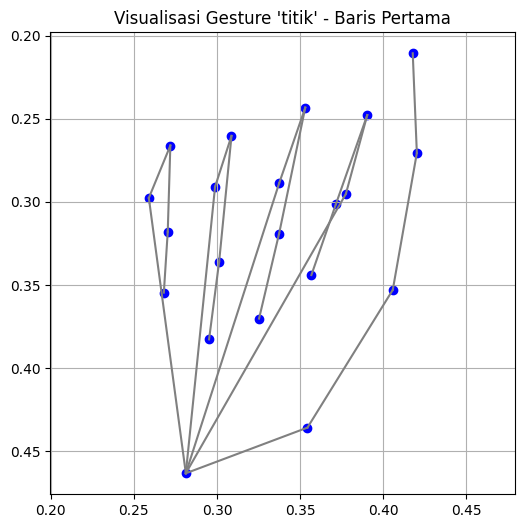

In [43]:
import matplotlib.pyplot as plt

# Filter baris dengan Label 'titik'
df_titik = df[df['Label'] == 'to_angka']

# Ambil baris pertama
sample = df_titik.iloc[22]

# Ambil koordinat X0-X20 dan Y0-Y20
x_coords = [sample[f'X{i}'] for i in range(21)]
y_coords = [sample[f'Y{i}'] for i in range(21)]

# Buat plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='blue')

# Garis koneksi antar titik sesuai struktur tangan MediaPipe
connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),         # ibu jari
    (0, 5), (5, 6), (6, 7), (7, 8),         # telunjuk
    (0, 9), (9,10), (10,11), (11,12),       # jari tengah
    (0,13), (13,14), (14,15), (15,16),      # jari manis
    (0,17), (17,18), (18,19), (19,20)       # kelingking
]

# Gambar garis penghubung
for start, end in connections:
    plt.plot([x_coords[start], x_coords[end]], [y_coords[start], y_coords[end]], color='gray')

# Invert Y biar seperti bentuk tangan asli
plt.gca().invert_yaxis()
plt.axis('equal')
plt.grid(True)
plt.title("Visualisasi Gesture 'titik' - Baris Pertama")
plt.show()


In [106]:
df = pd.read_csv('csv/static/pure.csv')

In [ ]:
df = pd.read_csv('csv/static/angka_pure.csv')
df2 = pd.read_csv('csv/static/pure.csv')

# Gabung secara vertikal
# df_combined = pd.concat([df, df2], ignore_index=True)

In [ ]:
import pandas as pd


# 1. Jumlah kolom
print("Jumlah Kolom:", df.shape[1])

# 2. Jumlah baris (sampel)
print("Jumlah Sampel:", df.shape[0])

# 3. Statistik deskriptif untuk fitur numerik
print(df.describe())

# 4. Daftar nama label unik
print("Label unik:", df['Label'].unique())

# 5. Distribusi jumlah tiap label


# 6. Cek apakah ada missing values
print("Jumlah nilai kosong per kolom:\n", df.isnull().sum())

# 7. Korelasi antar fitur (jika perlu analisis lebih dalam)
corr = df.iloc[:, :-2].corr()


Jumlah Kolom: 65
Jumlah Sampel: 4683
                X0           X1           X2           X3           X4  \
count  4683.000000  4683.000000  4683.000000  4683.000000  4683.000000   
mean      0.314045     0.350543     0.376947     0.385215     0.384166   
std       0.135765     0.125056     0.122432     0.127180     0.136500   
min       0.059678     0.081987     0.127018     0.121445     0.085295   
25%       0.215311     0.261578     0.277623     0.280493     0.282865   
50%       0.301228     0.336904     0.363937     0.370853     0.358562   
75%       0.403572     0.445254     0.477895     0.487520     0.490350   
max       0.696763     0.727064     0.755287     0.800439     0.824825   

                X5           X6           X7           X8           X9  ...  \
count  4683.000000  4683.000000  4683.000000  4683.000000  4683.000000  ...   
mean      0.364532     0.381800     0.390409     0.395305     0.347417  ...   
std       0.133568     0.140121     0.146043     0.151531  

In [30]:
df_combined.shape

(6900, 65)

In [31]:
print("Distribusi label:\n", df['Label'].value_counts())

Distribusi label:
 Label
koma        150
2           130
9           125
8           122
3           121
7           120
1           120
4           119
titik       115
0           115
to_angka    115
6           111
5           110
space        92
Name: count, dtype: int64


In [105]:
df_combined['Label'].unique().shape

(53,)

In [112]:
df = pd.read_csv('csv/static/pure.csv')

In [114]:
df.Label.unique()

array(['7', '3', '8', '9', 'space', 'd', '6', '5', 'g', 'c', 'h', 'q',
       'o', 'paham2', 't', 'backspace', 'paham1', '10_2', 'z', 'cepat2',
       's', 'menang1', 'w', 'n', 'p', 'm', 'b', 'x', 'menang2', 'lihat2',
       'percaya', 'y', 'j2', 'u', 'cepat1', 'r', 'a', 'v', 'e', 'k',
       'tidak1', 'f', 'l', 'i', 'lihat1', 'delete_all'], dtype=object)

In [113]:
import pandas as pd

# Hitung jumlah sampel per label
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Jumlah Sampel']

# Urutkan berdasarkan abjad label
label_counts = label_counts.sort_values('Label').reset_index(drop=True)

# Tampilkan tabel
print(label_counts)


         Label  Jumlah Sampel
0         10_2            154
1            3            121
2            5            110
3            6            111
4            7            120
5            8            122
6            9            125
7            a            115
8            b            140
9    backspace             80
10           c            115
11      cepat1            119
12      cepat2            120
13           d            175
14  delete_all             80
15           e            115
16           f            115
17           g            153
18           h            150
19           i            115
20          j2            120
21           k            179
22           l            115
23      lihat1            129
24      lihat2            123
25           m            115
26     menang1            120
27     menang2            157
28           n            115
29           o            115
30           p            155
31      paham1            120
32      pa

In [ ]:
df['Label']

## FUNGSI NORMALISASI

In [1]:
def normalisasi(data):
    dmin, dmax = np.min(data), np.max(data)
    # normalisasi = ((data - dmin) / (dmax - dmin)) * (d2max - d2min) + d2min
    normalisasi = data - dmin
    return normalisasi

In [2]:
def scale_points(points, new_x_max):
    """
    Melakukan transformasi skala pada kumpulan titik berdasarkan nilai maksimum baru untuk sumbu X.
    
    Parameters:
        points (numpy.ndarray): Array 2D berisi koordinat titik, dengan kolom pertama sebagai X dan kedua sebagai Y.
        new_x_max (float): Nilai maksimum baru untuk sumbu X setelah transformasi.
        
    Returns:
        numpy.ndarray: Array 2D dari titik yang telah ditransformasi.
    """
    # Nilai maksimum awal untuk X
    x_max_original = np.max(points[:, 0])
    
    # Hitung skala
    scale = new_x_max / x_max_original
    
    # Transformasi titik berdasarkan skala
    transformed_points = (points * scale)
    
    return transformed_points[:,0],transformed_points[:,1]
    
    

## EXTRACT DATA WITH NORMALISATION

In [ ]:
import os
import pandas as pd
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
# Direktori gambar


# Inisialisasi MediaPipe HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)
max_images = 38
path = 'img'

# Data untuk DataFrame
folders = ['a']
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and not f.startswith('.') ] and f in list('a'))
data = []
for target in folders:
    data_separated = []
    image_directory = "img/"+target
    img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0])) #FULL
    # img_path = [sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0]))[i] for i in [2, 40, 70,112]]
    for img in img_path:
        image_path = os.path.join(image_directory, img)
        image = cv2.imread(image_path )
        
        if image is None:
            print(f"Gagal membuka {image_path } i")
            continue
    
        # Konversi ke RGB untuk MediaPipe
        frame_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    
        # Deteksi tangan
        detection_result = detector.detect(mp_image)
        if not detection_result.hand_landmarks:
            print(f"Tidak ada tangan terdeteksi dalam {image_path } in label {target} ")
            os.remove(image_path)
         
        
        # Format data sesuai permintaan
        for hand_idx, hand in enumerate(detection_result.hand_landmarks):
            landmark_points = []  # Menyimpan titik untuk koneksi garis

            # Ekstrak semua titik koordinat
            nilai_X = np.array([landmark.x for landmark in hand])
            nilai_Y = np.array([landmark.y for landmark in hand])
            nilai_Z = np.array([landmark.y for landmark in hand])
            newX = normalisasi(nilai_X,(np.max(nilai_X)-np.min(nilai_X))) 
            newY = normalisasi(nilai_Y,(np.max(nilai_Y)-np.min(nilai_Y)))
            newXY = np.column_stack((newX, newY) )  # Simpan dalam list koordinat int 
            newX , newY = scale_points(newXY,10)
            # Buat dictionary untuk DataFrame dengan format X1, X2,..., Y1, Y2,..., Z
            row_data = {f"X{idx}": x for idx, x in zip(range(21),newX )}
            row_data.update({f"Y{idx}": y for idx, y in zip(range(21),newY)})
            row_data.update({f"Z{idx}": y for idx, y in zip(range(21),nilai_Z)})
         
            row_data.update({f"Z{idx}": y for idx, y in zip(range(0,21),y_coords)})
   
            row_data["Label"] = target
          # Label tetap "a"
            data.append(row_data)
            # data.append(row_data)
            data_separated.append(row_data)
        directory_goal = f'csv_separated/{target}'
        if not os.path.exists(directory_goal):
            os.makedirs(directory_goal)
        pd.DataFrame(data_separated).to_csv(f'{directory_goal}/filter.csv', index=False)

        
    print('next')
df = pd.DataFrame(data)


I0000 00:00:1745946858.132600  366392 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745946858.134345  367301 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1745946858.157290  367303 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745946858.170260  367322 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


next


In [5]:
import pandas as pd
pd.read_csv('csv/static/pure.csv').columns.shape

(65,)

In [4]:
import pandas as pd
pd.read_csv('csv/static/raw.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.679648,0.637627,0.627574,0.649179,0.669358,0.686413,0.695403,0.699640,0.703411,0.721814,...,0.001035,0.001243,0.001868,0.002784,0.003031,0.002410,0.002608,0.004013,126,lihat1
4679,0.634828,0.589179,0.584582,0.606102,0.627266,0.626494,0.647918,0.660593,0.670018,0.663750,...,0.025437,0.041651,0.049387,0.053944,0.024894,0.043140,0.053693,0.060905,127,lihat1
4680,0.587565,0.545752,0.532387,0.548048,0.569020,0.578832,0.602211,0.614780,0.623632,0.612999,...,-0.008082,-0.005477,-0.002638,-0.002016,-0.007925,-0.005930,-0.003743,-0.001941,128,lihat1
4681,0.570078,0.531714,0.519260,0.537741,0.563122,0.560433,0.582773,0.595728,0.605505,0.592938,...,-0.009190,-0.009736,-0.007093,-0.005440,-0.010266,-0.010199,-0.007267,-0.004349,129,lihat1


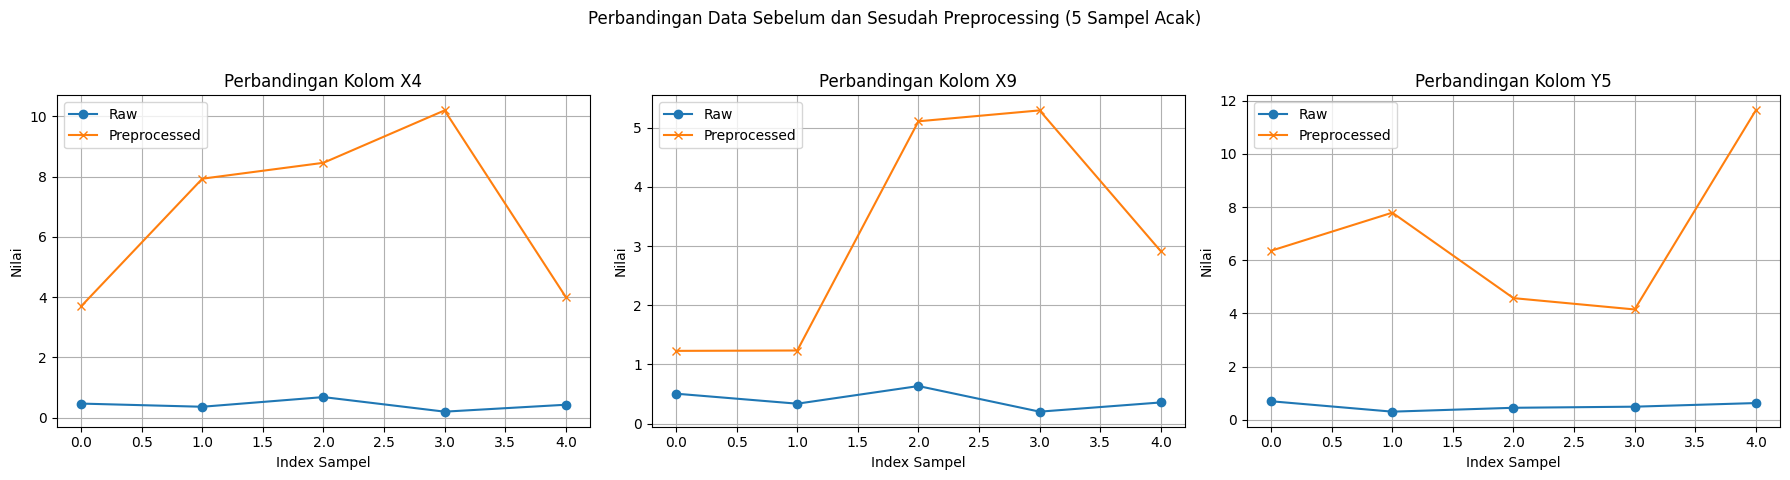

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Muat kedua dataset
df_raw = pd.read_csv('csv/dinamic/pure.csv')
df_prep = pd.read_csv('csv/dinamic/filter2.csv')

# Pastikan ukuran sama
min_len = min(len(df_raw), len(df_prep))
if len(df_raw) != len(df_prep):
    df_raw = df_raw.iloc[:min_len]
    df_prep = df_prep.iloc[:min_len]

# Pilih 5 index acak yang sama
random_indices = random.sample(range(min_len), 5)

# Ambil kolom yang diminta
cols = ['X4', 'X9', 'Y5']
raw_selected = df_raw.loc[random_indices, cols].reset_index(drop=True)
prep_selected = df_prep.loc[random_indices, cols].reset_index(drop=True)

# Gabungkan untuk visualisasi
comparison_df = pd.concat([raw_selected, prep_selected], axis=1, keys=['Raw', 'Preprocessed'])

# Visualisasi per kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    axes[i].plot(raw_selected[col], marker='o', label='Raw')
    axes[i].plot(prep_selected[col], marker='x', label='Preprocessed')
    axes[i].set_title(f'Perbandingan Kolom {col}')
    axes[i].set_xlabel('Index Sampel')
    axes[i].set_ylabel('Nilai')
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('Perbandingan Data Sebelum dan Sesudah Preprocessing (5 Sampel Acak)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [21]:
PATH = 'csv/static/pure2.csv'

## Preprocessing data pada csv


In [22]:
import pandas as pd
import numpy as np

# Membaca data
df = pd.read_csv(PATH)

def translasi_posisi(data, d2max=10, d2min=0):
    # Mencari nilai min dan max untuk setiap baris
    dmin = np.min(data, axis=1)  # Minimum untuk setiap baris
    dmax = np.max(data, axis=1)  # Maximum untuk setiap baris
    
    # Normalisasi per baris
    norm_data = (data - dmin[:, np.newaxis]) 
    
    # Skala hasil normalisasi ke rentang [d2min, d2max] yang diinginkan
    return norm_data

# Fungsi penskalaan (scaling) untuk points 2D (vektor)
def scale_points(points, new_x_max,x):
    # Skala berdasarkan nilai maksimum X yang baru
    x_max_original = np.max(x,axis=1)  # Nilai maksimum awal untuk X
  
    scale = new_x_max / x_max_original  # Hitung skala
    
    transformed_points = points * scale[:, np.newaxis]  # Transformasi titik berdasarkan skala

    return transformed_points

# Proses normalisasi dan penskalaan pada seluruh dataframe
def process_hand_data_v2(df, new_x_max=1):
    # Ekstrak kolom X dan Y (kolom X0-X20, Y0-Y20)
    x_cols = [col for col in df.columns if col.startswith('X')]
    y_cols = [col for col in df.columns if col.startswith('Y')]
    
    # Ambil semua nilai X dan Y sebagai array 2D
    nilai_X = df[x_cols].values
    nilai_Y = df[y_cols].values
    
    # Normalisasi per baris untuk X dan Y
    newX = translasi_posisi(nilai_X, new_x_max)  # Rentang akhir 10 untuk X
    newY = translasi_posisi(nilai_Y, new_x_max)  # Rentang akhir 10 untuk Y
   
    # Gabungkan koordinat X dan Y setelah dinormalisasi
    newXY = np.column_stack((newX, newY))
    
    # Skalakan titik untuk memastikan X berada dalam rentang [0, 10]
    scaled_points = scale_points(newXY, new_x_max,newX)
    
    # Menyimpan hasil normalisasi dan penskalaan kembali ke DataFrame
    df[x_cols] = scaled_points[:, :len(x_cols)]
    df[y_cols] = scaled_points[:, len(x_cols):]
    
    return df
# Proses DataFrame dengan fungsi yang lebih efisien
df = process_hand_data_v2(df)

In [23]:
df.to_csv('csv/static/sibi_static.csv',index=False)

In [20]:

# 1. Filter DataFrame di mana label == 'g'
df_g = df[df['Label'] == 'i'].copy()

# 2. Pilih hanya kolom yang diawali dengan 'Y'
y_cols = [col for col in df.columns if col.startswith('Y')]

# 3. Cari nama kolom dengan nilai maksimum di setiap baris untuk kolom 'Y'
# axis=1 berarti operasi dilakukan secara horizontal (per baris)
max_y_cols = df_g[y_cols].idxmin(axis=1)

# 4. Hitung frekuensi setiap nama kolom muncul sebagai yang tertinggi
top_cols_counts = max_y_cols.value_counts()

# 5. Ambil 3 kolom teratas dan cetak hasilnya
top_3 = top_cols_counts.head(3)

print("3 kolom teratas dengan jumlah baris tertinggi (nilai maksimum):")
print(top_3)

3 kolom teratas dengan jumlah baris tertinggi (nilai maksimum):
Y20    239
Y6       1
Name: count, dtype: int64


In [73]:
import numpy as np

a = np.array([1, 2, 3])        # shape = (3,)
print(a.shape)                # (3,)

a_col = a[:, np.newaxis]      # shape = (3, 1)
a_row = a[np.newaxis, :]      # shape = (1, 3)

print(a_col*3)
# [[1]
#  [2]
#  [3]]

print(a_row)
# [[1 2 3]]


(3,)
[[3]
 [6]
 [9]]
[[1 2 3]]


In [9]:
df = pd.read_csv(PATH)  

In [10]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [69]:

df = pd.read_csv(PATH)

def scale_points_per_row(points, new_x_max, x_rows):
    # Skala berdasarkan maksimum X per baris
    x_max_original = np.max(x_rows, axis=1)  # (jumlah_baris,)

    scale_factors = new_x_max / x_max_original  # Skala per baris
    print(scale_factors)
    # Skalakan semua titik per baris
    scaled_points = points * scale_factors[:, np.newaxis]
    return scaled_points

def process_hand_data_v2(df, new_x_max=1):
    # Ekstrak kolom X dan Y (X0-X20, Y0-Y20)
    x_cols = [col for col in df.columns if col.startswith('X')]
    y_cols = [col for col in df.columns if col.startswith('Y')]
    
    # Ambil nilai X dan Y sebagai array
    nilai_X = df[x_cols].values  # shape: (n_baris, 21)
    nilai_Y = df[y_cols].values  # shape: (n_baris, 21)
    
    # Normalisasi posisi per baris
    newX = translasi_posisi(nilai_X, new_x_max)
    newY = translasi_posisi(nilai_Y, new_x_max)

    # Gabungkan X dan Y -> (n_baris, 42)
    newXY = np.hstack((newX, newY))

    # Penskalaan berdasarkan max X per baris
    scaled_points = scale_points_per_row(newXY, new_x_max, newX)

    # Simpan hasil ke dataframe
    df[x_cols] = scaled_points[:, :len(x_cols)]
    df[y_cols] = scaled_points[:, len(x_cols):]
    
    return df
df = process_hand_data_v2(df)

[4.98040266 4.93591832 4.80546275 ... 9.36188606 6.07255519 5.95187476]


In [65]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.256020,0.514136,0.725918,0.929912,0.397012,0.653643,0.842896,1.000000,0.264078,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.265163,0.517476,0.725739,0.925642,0.409873,0.661897,0.848276,1.000000,0.280747,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.257086,0.518731,0.727293,0.925496,0.411693,0.667454,0.850654,1.000000,0.287383,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.244511,0.509592,0.721539,0.926657,0.393826,0.655132,0.844311,1.000000,0.268006,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.729126,0.914529,0.979186,0.993100,1.000000,0.764506,0.762134,0.777156,0.802819,0.591335,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.647615,0.853930,0.952293,1.000000,0.982865,0.763898,0.834383,0.886278,0.940697,0.591710,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.511817,0.729079,0.888663,0.972614,1.000000,0.723692,0.808926,0.874593,0.932380,0.560877,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.441551,0.662815,0.838300,0.938749,1.000000,0.650405,0.735289,0.775842,0.808545,0.505305,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [63]:
import pandas as pd
import numpy as np

# ===============================
# 1. Fungsi Normalisasi Presisi
# ===============================
def normalize_landmarks_preserve_structure(df):
    x_cols = [col for col in df.columns if col.startswith('X')]
    y_cols = [col for col in df.columns if col.startswith('Y')]

    X = df[x_cols].values  # shape: (n, 21)
    Y = df[y_cols].values  # shape: (n, 21)

    # Gabungkan jadi koordinat 2D (n, 21, 2)
    coords = np.stack([X, Y], axis=2)  # shape: (n_baris, 21, 2)

    # Translasi: geser ke (0,0)
    min_coords = np.min(coords, axis=1, keepdims=True)
    coords_shifted = coords - min_coords

    # Skala global: ambil skala maksimum dari width dan height per baris
    max_coords = np.max(coords_shifted, axis=1, keepdims=True)
    scale = np.max(max_coords, axis=2, keepdims=True)  # shape: (n,1,1)

    coords_scaled = coords_shifted / (scale + 1e-8)

    # Kembalikan ke kolom X dan Y
    norm_X = coords_scaled[:, :, 0]
    norm_Y = coords_scaled[:, :, 1]

    df[x_cols] = norm_X
    df[y_cols] = norm_Y

    return df


# ===============================
# 2. Fungsi Verifikasi Rasio
# ===============================
def verify_ratios(X_orig, Y_orig, X_norm, Y_norm):
    coords_orig = np.stack([X_orig, Y_orig], axis=1)
    coords_norm = np.stack([X_norm, Y_norm], axis=1)

    def pairwise_dist(arr):
        diff = arr[:, np.newaxis, :] - arr[np.newaxis, :, :]
        dist = np.power(np.sum(diff ** 2, axis=2), 0.5)
        return dist

    dist_before = pairwise_dist(coords_orig)
    dist_after = pairwise_dist(coords_norm)

    ratio = dist_after / (dist_before + 1e-8)

    mean_ratio = np.mean(ratio)
    std_ratio = np.std(ratio)

    print("\n📊 Verifikasi Rasio:")
    print(f"   Rata-rata rasio: {mean_ratio:.6f}")
    print(f"   Standar deviasi rasio: {std_ratio:.6f}")

    # Cek apakah semua rasio ~ sama (std dev kecil)
    if std_ratio < 1e-4:  # toleransi kecil
        print("✅ Struktur tangan terjaga. Rasio antar titik stabil.")
    else:
        print("⚠️ Ada distorsi bentuk tangan. Rasio antar titik berubah.")


# ===============================
# 3. Program Utama
# ===============================
if __name__ == "__main__":
    # Ganti PATH dengan file CSV kamu

    
    # 1. Load data
    df = pd.read_csv(PATH)

    # Simpan salinan asli untuk verifikasi
    df_orig = df.copy()

    # 2. Normalisasi dengan menjaga struktur
    df_norm = normalize_landmarks_preserve_structure(df.copy())

    # 3. Ambil satu sampel baris untuk verifikasi (misal baris ke-0)
    x_cols = [col for col in df.columns if col.startswith('X')]
    y_cols = [col for col in df.columns if col.startswith('Y')]

    idx = 0  # bisa kamu ubah ke baris lain

    X_orig = df_orig.loc[idx, x_cols].values
    Y_orig = df_orig.loc[idx, y_cols].values
    X_norm = df_norm.loc[idx, x_cols].values
    Y_norm = df_norm.loc[idx, y_cols].values

    # 4. Verifikasi rasio antar titik
    verify_ratios(X_orig, Y_orig, X_norm, Y_norm)



📊 Verifikasi Rasio:
   Rata-rata rasio: 4.743240
   Standar deviasi rasio: 1.060621
⚠️ Ada distorsi bentuk tangan. Rasio antar titik berubah.


In [58]:
x_cols

['X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20']

In [56]:
def verify_ratios(X_orig, Y_orig, X_norm, Y_norm):
    coords_orig = np.stack([X_orig, Y_orig], axis=1)  # shape: (21, 2)
    coords_norm = np.stack([X_norm, Y_norm], axis=1)  # shape: (21, 2)

    def pairwise_dist(arr):
        return np.linalg.norm(arr[:, np.newaxis, :] - arr[np.newaxis, :, :], axis=2)

    dist_before = pairwise_dist(coords_orig)
    dist_after = pairwise_dist(coords_norm)

    ratio = dist_after / (dist_before + 1e-8)

    print("Rasio rata-rata antar titik:", np.mean(ratio))
    print("Standar deviasi rasio:", np.std(ratio))


In [57]:
idx = 0  # baris pertama
X_orig = df.loc[idx, x_cols].values
Y_orig = df.loc[idx, y_cols].values
X_norm = df_norm.loc[idx, x_cols].values
Y_norm = df_norm.loc[idx, y_cols].values

verify_ratios(X_orig, Y_orig, X_norm, Y_norm)


TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable sqrt method

In [51]:
df_norm

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.256020,0.514136,0.725918,0.929912,0.397012,0.653643,0.842896,1.000000,0.264078,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.265163,0.517476,0.725739,0.925642,0.409873,0.661897,0.848276,1.000000,0.280747,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.257086,0.518731,0.727293,0.925496,0.411693,0.667454,0.850654,1.000000,0.287383,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.244511,0.509592,0.721539,0.926657,0.393826,0.655132,0.844311,1.000000,0.268006,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.268639,0.336948,0.360771,0.365897,0.368439,0.281674,0.280800,0.286335,0.295790,0.217871,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.215738,0.284468,0.317235,0.333128,0.327420,0.254476,0.277956,0.295244,0.313372,0.197115,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.247098,0.351990,0.429035,0.469565,0.482787,0.349389,0.390539,0.422242,0.450141,0.270784,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.294059,0.441414,0.558281,0.625177,0.665968,0.433149,0.489679,0.516686,0.538465,0.336517,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [48]:
# Ambil 30 sampel acak dari data (indeks yang sama untuk keduanya)
sample_indices = np.random.choice(df.index, size=30, replace=False)

# Ambil kolom X0 dan Y0 sebagai contoh koordinat untuk ditampilkan
# (bisa juga pakai lebih banyak kolom jika ingin)
x_cols = [col for col in df.columns if col.startswith('X')]
y_cols = [col for col in df.columns if col.startswith('Y')]

# Misalnya, tampilkan X0, Y0, X5, Y5, X8, Y8 untuk ilustrasi
selected_cols = ['X0', 'Y0', 'X5', 'Y5', 'X8', 'Y8']

# Buat DataFrame perbandingan
comparison_df = pd.DataFrame({
    f'{col}_before': df.loc[sample_indices, col].values for col in selected_cols
} | {
    f'{col}_after': df_norm.loc[sample_indices, col].values for col in selected_cols
})

# Reset index agar rapi ditampilkan
comparison_df.reset_index(drop=True, inplace=True)

# Tampilkan hasil
print(comparison_df.head(10))  # Tampilkan 10 baris pertama dari 30 sampel


   X0_before  Y0_before  X5_before  Y5_before  X8_before  Y8_before  X0_after  \
0   0.000000   0.752323   0.540607   0.077559   0.914980   0.698237  0.000000   
1   0.163711   1.000000   0.801505   0.519714   1.000000   0.029071  0.163711   
2   0.211721   1.000000   0.854134   0.383475   0.880180   0.302595  0.211721   
3   0.000000   0.178136   0.526590   0.008643   1.000000   0.055470  0.000000   
4   0.036873   1.000000   0.670755   0.485940   0.666636   0.069003  0.036873   
5   0.000000   0.762319   0.524960   0.164084   0.998576   0.348852  0.000000   
6   0.000000   0.265257   0.516649   0.000000   1.000000   0.243353  0.000000   
7   0.890244   1.000000   0.463195   0.456787   0.086974   0.028430  0.890244   
8   0.545651   1.000000   0.911990   0.485205   0.765586   0.065673  0.545651   
9   0.007690   0.057186   0.518410   0.835411   0.411601   0.503566  0.007690   

   Y0_after  X5_after  Y5_after  X8_after  Y8_after  
0  0.752323  0.540607  0.077559  0.914980  0.698237  


In [45]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.256020,0.514136,0.725918,0.929912,0.397012,0.653643,0.842896,1.000000,0.264078,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.265163,0.517476,0.725739,0.925642,0.409873,0.661897,0.848276,1.000000,0.280747,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.257086,0.518731,0.727293,0.925496,0.411693,0.667454,0.850654,1.000000,0.287383,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.244511,0.509592,0.721539,0.926657,0.393826,0.655132,0.844311,1.000000,0.268006,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.729126,0.914529,0.979185,0.993100,1.000000,0.764505,0.762134,0.777156,0.802819,0.591335,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.647615,0.853930,0.952293,1.000000,0.982865,0.763898,0.834383,0.886278,0.940696,0.591710,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.511817,0.729079,0.888663,0.972614,1.000000,0.723692,0.808926,0.874593,0.932380,0.560877,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.441551,0.662815,0.838300,0.938749,1.000000,0.650405,0.735289,0.775842,0.808545,0.505305,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [36]:
df_normalized

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.0,1.307334,2.577104,3.622570,4.644785,1.958468,3.241247,4.196245,4.980403,1.309437,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.0,1.263692,2.537732,3.583073,4.589970,1.959617,3.226329,4.160468,4.935918,1.303469,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g


In [33]:
df_normalized.iloc[0,21:42]

Y0     4.980403
Y1     4.945322
Y2     4.096244
Y3     3.907245
Y4     3.739683
Y5     0.271082
Y6     0.184376
Y7     0.279313
Y8      0.29841
Y9          0.0
Y10    1.630962
Y11     3.41028
Y12    3.934748
Y13    0.665709
Y14    2.502002
Y15    4.042683
Y16    4.225553
Y17    1.663984
Y18     2.95867
Y19    3.906897
Y20    3.933554
Name: 0, dtype: object

In [29]:
df.iloc[0,:21].max()

0.3201303482055664

In [31]:
df.iloc[0,21:42].max()

0.628983199596405

In [25]:
df_normalized

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,1.307334,2.577104,3.622570,4.644785,1.958468,3.241247,4.196245,4.980403,1.309437,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,1.263692,2.537732,3.583073,4.589970,1.959617,3.226329,4.160468,4.935918,1.303469,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,1.274230,2.486714,3.487512,4.448138,1.969630,3.180721,4.076359,4.805463,1.349120,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,1.253124,2.528471,3.545072,4.511181,2.006732,3.253398,4.146377,4.874341,1.400803,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,1.222270,2.547368,3.606856,4.632205,1.968674,3.274896,4.220572,4.998837,1.339720,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,3.577300,4.486939,4.804164,4.872433,4.906286,3.750883,3.739247,3.812950,3.938858,2.901257,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,3.028249,3.992976,4.452925,4.676001,4.595880,3.571988,3.901576,4.144236,4.398698,2.766835,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,2.313306,3.295290,4.016575,4.396016,4.519795,3.270939,3.656182,3.952980,4.214167,2.535048,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,1.785688,2.680508,3.390191,3.796419,4.044126,2.630322,2.973602,3.137603,3.269857,2.043518,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [20]:
df_normalized

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,1.307334,2.577104,3.622570,4.644785,1.958468,3.241247,4.196245,4.980403,1.309437,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,1.263692,2.537732,3.583073,4.589970,1.959617,3.226329,4.160468,4.935918,1.303469,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,1.274230,2.486714,3.487512,4.448138,1.969630,3.180721,4.076359,4.805463,1.349120,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,1.253124,2.528471,3.545072,4.511181,2.006732,3.253398,4.146377,4.874341,1.400803,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,1.222270,2.547368,3.606856,4.632205,1.968674,3.274896,4.220572,4.998837,1.339720,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,3.577300,4.486939,4.804164,4.872433,4.906286,3.750883,3.739247,3.812950,3.938858,2.901257,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,3.028249,3.992976,4.452925,4.676001,4.595880,3.571988,3.901576,4.144236,4.398698,2.766835,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,2.313306,3.295290,4.016575,4.396016,4.519795,3.270939,3.656182,3.952980,4.214167,2.535048,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,1.785688,2.680508,3.390191,3.796419,4.044126,2.630322,2.973602,3.137603,3.269857,2.043518,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [175]:
df.Label.unique()

array(['g', 'c', 'h', 'q', 'o', 'paham2', 't', 'backspace', 'paham1',
       '10_2', 'z', 'cepat2', 's', 'menang1', 'w', 'n', 'p', 'm', 'b',
       '7', '3', '8', 'd', 'x', 'menang2', 'lihat2', '9', 'percaya',
       'space', 'y', 'j2', 'u', 'cepat1', 'r', 'a', 'v', 'e', 'k',
       'tidak1', 'f', 'l', 'i', '6', 'lihat1', 'delete_all', '5'],
      dtype=object)

In [ ]:
Y=[2,1,12,16,3,0,5,6,20,4,9,8,15,13,11,17,19,7,14,10,18]
len(Y)
X=[4,20,19,3,2,14,18,13,6,15,7,8,17,5]
len(X)

12

2,1,12,16,3,0,5,6,20,4,9,8,15,13,11,17,19,7
4,20,19,3,2,14,18,13,6,15,7,8

In [59]:
import pandas as pd
import numpy as np

# Asumsi: df adalah DataFrame dengan kolom X0-X20, Y0-Y20, Label
df_uv = df[df['Label'].isin(['u', 'v'])].copy()  # Filter hanya label 'u' dan 'v'

In [60]:
def calculate_finger_distance(df):
    """Hitung jarak antara landmark 8 (telunjuk) dan 12 (tengah)."""
    x8, y8 = df['X8'], df['Y8']
    x12, y12 = df['X12'], df['Y12']
    return np.sqrt((x8 - x12)**2 + (y8 - y12)**2)

# Tambahkan kolom jarak
df_uv['finger_distance'] = calculate_finger_distance(df_uv)

In [63]:
df_uv.to_csv(f'csv/static/filter_uv.csv',index=False)

In [6]:
df.to_csv(f'csv/static/filter.csv',index=False)

In [11]:
df.Label.unique().shape

(46,)

In [65]:
import numpy as np
import pandas as pd

# Set seed untuk reproducibility
np.random.seed(42)

# Generate data dummy (21 landmark X,Y)
num_samples = 1000
landmarks = np.random.rand(num_samples, 42)  # 21 titik (X0-Y20)

# Beri label 'u' atau 'v' berdasarkan jarak telunjuk-tengah
def generate_label(X8, Y8, X12, Y12):
    distance = np.sqrt((X8 - X12)**2 + (Y8 - Y12)**2)
    return 'u' if distance < 0.15 else 'v'  # Threshold arbitrer

labels = [
    generate_label(
        landmarks[i, 16], landmarks[i, 17],  # X8, Y8
        landmarks[i, 24], landmarks[i, 25]   # X12, Y12
    ) for i in range(num_samples)
]

# Convert ke DataFrame
df = pd.DataFrame(landmarks, columns=[f'{ax}{i}' for i in range(21) for ax in ['X', 'Y']])
df['Label'] = labels

# Contoh data
df

,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,...,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,Label
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,v
1,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,...,0.729007,0.771270,0.074045,0.358466,0.115869,0.863103,0.623298,0.330898,0.063558,v
2,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,0.119594,0.713245,0.760785,0.561277,...,0.186570,0.892559,0.539342,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,v
3,0.818015,0.860731,0.006952,0.510747,0.417411,0.222108,0.119865,0.337615,0.942910,0.323203,...,0.728216,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,v
4,0.040775,0.590893,0.677564,0.016588,0.512093,0.226496,0.645173,0.174366,0.690938,0.386735,...,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214141,0.096271,0.097098,0.945777,0.936083,0.749308,0.643063,0.847970,0.058409,0.119486,...,0.889704,0.796734,0.829006,0.439840,0.753255,0.581225,0.374775,0.842742,0.998758,v
996,0.899282,0.776192,0.747508,0.650249,0.853617,0.493081,0.181730,0.768050,0.919506,0.341352,...,0.361310,0.662660,0.073847,0.286558,0.424790,0.857213,0.563496,0.045225,0.801867,v
997,0.054521,0.934367,0.211717,0.487926,0.072281,0.561712,0.497229,0.410249,0.035573,0.878936,...,0.504617,0.424267,0.295920,0.919608,0.008171,0.122105,0.733344,0.263442,0.723179,v
998,0.832254,0.254616,0.191944,0.145301,0.200089,0.267185,0.868750,0.770004,0.001844,0.874119,...,0.624079,0.650112,0.584968,0.205111,0.505981,0.884357,0.868602,0.750788,0.697196,v


In [66]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Concatenate
from tensorflow.keras.models import Model

# Custom Layer untuk hitung jarak
class FingerDistanceLayer(Layer):
    def call(self, inputs):
        x8 = inputs[:, 16]  # X8 (indeks ke-16)
        y8 = inputs[:, 17]  # Y8
        x12 = inputs[:, 24]  # X12
        y12 = inputs[:, 25]  # Y12
        distance = tf.sqrt((x8 - x12)**2 + (y8 - y12)**2)
        return tf.expand_dims(distance, axis=-1)

# Arsitektur model
input_layer = Input(shape=(42,))  # Input: 21 landmark (X0-Y20)
distance_layer = FingerDistanceLayer()(input_layer)
merged = Concatenate()([input_layer, distance_layer])
output = Dense(64, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(output)  # Binary classification

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 42)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ finger_distance_la… │ (None, 1)         │          0 │ input_layer_7[0]… │
│ (FingerDistanceLay… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 43)        │          0 │ input_layer_7[0]… │
│ (Concatenate)       │                   │            │ finger_distance_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 64)        │      2,816 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 1)         │         65 │ dense_23[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode label
le = LabelEncoder()
y = le.fit_transform(df['Label'])  # 'u'=0, 'v'=1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Label', axis=1).values,
    y,
    test_size=0.2
)

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9086 - loss: 0.3845 - val_accuracy: 0.9500 - val_loss: 0.1984
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9383 - loss: 0.2284 - val_accuracy: 0.9500 - val_loss: 0.1962
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9265 - loss: 0.2592 - val_accuracy: 0.9500 - val_loss: 0.1944
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9433 - loss: 0.2041 - val_accuracy: 0.9500 - val_loss: 0.1916
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9406 - loss: 0.2084 - val_accuracy: 0.9500 - val_loss: 0.1891
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9329 - loss: 0.2268 - val_accuracy: 0.9500 - val_loss: 0.1862
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9398 - loss: 0.2036 - val_accuracy: 0.9500 - val_loss: 0.1822
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9278 - loss: 0.2265 - val_accuracy: 0.9500 - v

In [142]:
df[df['Label']=='z']

,X3,X4,X6,X7,X8,X10,X11,X12,X14,X16,...,Y16,Y17,Y19,Y20,Z4,Z5,Z8,Z12,Z20,Label
1272,0.620412,0.553800,0.609672,0.710086,0.774501,0.459617,0.416129,0.359708,0.314228,0.250985,...,0.779183,0.482352,0.798444,0.785335,-0.076675,-0.034008,-0.081585,-0.073792,-0.066263,z
1273,0.648044,0.550161,0.609679,0.695170,0.746855,0.453927,0.428624,0.382615,0.304007,0.267301,...,0.800786,0.486136,0.806741,0.791544,-0.065024,-0.030589,-0.075569,-0.069992,-0.064648,z
1274,0.655857,0.537875,0.591483,0.647204,0.677048,0.437597,0.420456,0.381831,0.289051,0.261707,...,0.801509,0.510402,0.823028,0.796726,-0.053079,-0.031246,-0.076454,-0.066159,-0.064970,z
1275,0.632252,0.484146,0.556823,0.578507,0.582169,0.404069,0.392760,0.369413,0.260457,0.263092,...,0.821580,0.547542,0.856962,0.823616,-0.051304,-0.028386,-0.067759,-0.058877,-0.056110,z
1276,0.622380,0.456169,0.553759,0.563140,0.553748,0.385855,0.389253,0.378859,0.247346,0.267470,...,0.827879,0.549060,0.858603,0.820202,-0.046947,-0.029272,-0.070310,-0.061880,-0.060005,z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.518665,0.468715,0.464519,0.561599,0.632803,0.363047,0.366153,0.333443,0.278241,0.250242,...,0.601390,0.399593,0.625273,0.612246,-0.040683,-0.023582,-0.057727,-0.057446,-0.054615,z
1497,0.479592,0.492402,0.460428,0.567847,0.646506,0.363978,0.366405,0.335657,0.272826,0.243566,...,0.572175,0.362705,0.586762,0.576003,-0.046307,-0.024648,-0.063631,-0.059318,-0.051593,z
1498,0.497071,0.468079,0.473821,0.583719,0.665726,0.374283,0.365041,0.331270,0.278976,0.240757,...,0.509559,0.297585,0.533986,0.520996,-0.051850,-0.025143,-0.063662,-0.060158,-0.053554,z
1499,0.508654,0.473224,0.461980,0.554947,0.618435,0.360702,0.363849,0.331207,0.273479,0.254968,...,0.642239,0.427127,0.655791,0.657473,-0.050763,-0.026432,-0.063019,-0.060667,-0.054003,z


In [21]:
pd.read_csv('csv/static/filter.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.0,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.0,0.258327,0.518769,0.732461,0.938293,0.400590,0.659534,0.850493,1.009012,0.266458,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.0,0.274816,0.536315,0.752159,0.959339,0.424794,0.685993,0.879157,1.036404,0.290968,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.0,0.262680,0.530018,0.743118,0.945634,0.420651,0.681977,0.869163,1.021759,0.293636,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.0,0.243609,0.507713,0.718878,0.923239,0.392374,0.652716,0.841197,0.996312,0.267018,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,0.0,0.088521,0.238378,0.387401,0.445715,0.412194,0.492168,0.427603,0.363169,0.418116,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
5109,0.0,0.077284,0.212639,0.373947,0.442660,0.369622,0.489487,0.419909,0.347020,0.387698,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
5110,0.0,0.042045,0.147402,0.297640,0.385955,0.285512,0.431621,0.365643,0.294203,0.325706,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
5111,0.0,0.027985,0.115774,0.250317,0.336940,0.216791,0.393710,0.333120,0.261263,0.266437,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [90]:
df.to_csv('csv/static/filter_fix.csv',index=False)

## DROP KOLOM TERTENTU


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.to_csv('csv/static_raw/filter_fix.csv',index=False)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Label
0,0.000000,2.624956,5.174488,7.273648,9.326124,3.932348,6.508001,8.425513,10.000000,2.629178,...,0.599319,0.506578,0.558672,0.602381,0.607569,0.534898,0.571628,0.598528,0.599285,g
1,0.000000,2.583270,5.187694,7.324605,9.382927,4.005897,6.595340,8.504929,10.090124,2.664583,...,0.603865,0.509563,0.563531,0.605887,0.610267,0.537730,0.575576,0.601663,0.601931,g
2,0.000000,2.748158,5.363149,7.521592,9.593395,4.247943,6.859929,8.791570,10.364044,2.909677,...,0.608186,0.512301,0.568760,0.611362,0.614273,0.541641,0.580724,0.606767,0.606232,g
3,0.000000,2.626798,5.300179,7.431179,9.456337,4.206511,6.819772,8.691635,10.217592,2.936363,...,0.614516,0.517558,0.573352,0.615064,0.621126,0.545935,0.584658,0.610591,0.612398,g
4,0.000000,2.436093,5.077130,7.188783,9.232393,3.923741,6.527157,8.411973,9.963123,2.670181,...,0.611038,0.514408,0.571130,0.610620,0.617288,0.541695,0.579587,0.606636,0.611063,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,2.593528,0.500697,0.000000,1.076023,2.081046,2.930423,3.378173,3.589213,3.777007,4.693532,...,0.438054,0.579991,0.525929,0.530355,0.546927,0.610211,0.579010,0.580965,0.594059,lihat1
4679,2.502447,0.228917,0.000000,1.071760,2.125836,2.087375,3.154392,3.785621,4.255047,3.942865,...,0.426719,0.573717,0.516804,0.526176,0.543807,0.603426,0.565350,0.571501,0.586730,lihat1
4680,2.748098,0.665617,0.000000,0.779981,1.824454,2.313113,3.477518,4.103491,4.544356,4.014791,...,0.426158,0.565734,0.516555,0.529514,0.549311,0.594870,0.569564,0.580029,0.597145,lihat1
4681,2.530922,0.620228,0.000000,0.920414,2.184480,2.050577,3.163178,3.808414,4.295339,3.669435,...,0.430082,0.568105,0.522663,0.535882,0.555317,0.597988,0.571828,0.582683,0.600482,lihat1


In [1]:
#ABJAD
column_numbersY =sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbers =sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
# column_numbersZ=[2,4]

In [ ]:
Y=[2,1,12,16,3,0,5,6,20,4,9,8,15,13,11,17,19,7,14,10,18]
len(Y)
X=[4,20,19,3,2,14,18,13,6,15,7,8,17,5]
len(X)

In [55]:
#ABJAD
column_numbersY =sorted([2,1,12,16,3,0,5,6,20,4,9,8,15,13,11,17,19,7,14,10,18])
column_numbers =sorted([4,20,19,3,2,14,18,13,6,15,7,8,17,5,10,11,12])
# column_numbersZ=[2,4]

In [25]:
len(column_numbers+column_numbersY)

29

In [42]:
sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])

[0, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20]

In [250]:
len(column_numbers)+len(column_numbersY)+len(column_numbersZ)

31

In [34]:
sorted([12,2,16,5,6,20,8,0,3,4,15,7,11,13,10,19,17])

[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20]

In [22]:
column_numbersY =sorted([12,16,19,20,8,15,14,18,2,13,5,6,9,17,1,3,0,4])
column_numbers =sorted([4,20,19,18,3,14,13,15,5,17,11,7,8,12,])
# column_numbersZ=[4,5,8,12]
# len(column_numbers)+len(column_numbersY)+len(column_numbersZ)

In [7]:
column_numbers

[3, 4, 5, 7, 8, 11, 12, 13, 14, 15, 17, 18, 19, 20]

In [27]:
sorted([5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17])

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 16, 17, 17, 20]

In [ ]:
import pandas as pd
df =pd.read_csv('csv_separated/static/pure.csv')
df.iloc[:,42:]

,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,3.477078e-07,-0.012792,-0.030791,-0.050218,-0.069095,-0.035928,-0.064950,-0.081559,-0.092016,-0.045697,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,3.444977e-07,-0.012403,-0.030174,-0.049459,-0.068387,-0.036291,-0.065249,-0.082319,-0.093219,-0.046281,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,3.399134e-07,-0.012705,-0.031808,-0.052439,-0.072603,-0.039189,-0.069723,-0.087160,-0.097936,-0.049487,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,3.357878e-07,-0.013140,-0.031188,-0.049973,-0.068279,-0.040397,-0.069207,-0.085829,-0.096452,-0.049447,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,3.366230e-07,-0.014638,-0.032659,-0.051150,-0.069065,-0.039172,-0.067604,-0.083659,-0.093752,-0.047306,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,-2.877327e-07,0.001824,0.000313,-0.002011,-0.003055,0.001538,0.002238,0.002010,0.001076,-0.001621,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
5288,-3.020301e-07,-0.001072,-0.004628,-0.008031,-0.009670,-0.005314,-0.006427,-0.005821,-0.005667,-0.006697,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
5289,-2.691161e-07,-0.001291,-0.004892,-0.008496,-0.010289,-0.005721,-0.009495,-0.010034,-0.009976,-0.008049,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
5290,-2.393496e-07,-0.001463,-0.006257,-0.010911,-0.013554,-0.010630,-0.016951,-0.018285,-0.018150,-0.012950,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [158]:
pd.read_csv('csv/static/filter.csv').Label.unique().shape

(46,)

In [30]:
df = pd.read_csv('csv/static/filter.csv')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.258327,0.518769,0.732461,0.938293,0.400590,0.659534,0.850493,1.009012,0.266458,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.274816,0.536315,0.752159,0.959339,0.424794,0.685993,0.879157,1.036404,0.290968,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.262680,0.530018,0.743118,0.945634,0.420651,0.681977,0.869163,1.021759,0.293636,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.243609,0.507713,0.718878,0.923239,0.392374,0.652716,0.841197,0.996312,0.267018,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0.410773,0.713240,0.939784,1.034694,1.079597,0.741323,0.848692,0.893620,0.928197,0.556326,...,-0.019464,-0.035298,-0.052188,-0.064645,-0.024087,-0.042630,-0.055679,-0.064658,106,5
6390,0.293444,0.609383,0.855084,0.976238,1.022408,0.682354,0.807184,0.864732,0.911269,0.501901,...,-0.004732,-0.015818,-0.032296,-0.044682,-0.007350,-0.022959,-0.035271,-0.043746,107,5
6391,0.369174,0.696010,0.930176,1.042848,1.100148,0.747385,0.892081,0.969055,1.023515,0.562490,...,-0.012812,-0.026452,-0.043490,-0.055718,-0.017742,-0.036186,-0.050320,-0.059872,108,5
6392,0.217135,0.553139,0.819826,0.941073,0.990576,0.650141,0.778069,0.843909,0.896202,0.467833,...,-0.010628,-0.023872,-0.040453,-0.052721,-0.016467,-0.034047,-0.046766,-0.055560,109,5


In [4]:
df = pd.read_csv('csv/static/filter.csv')
df[df['Label']=='k']

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
5267,0.228914,0.431690,0.445150,0.384208,0.351207,0.155550,0.103625,0.046646,0.000000,0.066463,...,-0.048732,-0.080752,-0.070071,-0.055731,-0.064262,-0.085525,-0.075523,-0.062976,1,k
5268,0.272769,0.473212,0.486590,0.416764,0.377772,0.203147,0.135545,0.062264,0.000000,0.096598,...,-0.045099,-0.076085,-0.066755,-0.053056,-0.059406,-0.080317,-0.070945,-0.058638,2,k
5269,0.268574,0.486738,0.504475,0.432787,0.396882,0.240741,0.163677,0.086362,0.021689,0.113865,...,-0.034135,-0.063319,-0.055787,-0.043287,-0.046589,-0.066199,-0.058218,-0.047006,3,k
5270,0.287512,0.512271,0.523408,0.437031,0.396756,0.256516,0.170207,0.089677,0.026561,0.124540,...,-0.034244,-0.063478,-0.055776,-0.043505,-0.045767,-0.065542,-0.057313,-0.046226,4,k
5271,0.235062,0.434453,0.451937,0.396633,0.380395,0.195271,0.128189,0.059140,0.000823,0.075088,...,-0.045075,-0.077725,-0.068940,-0.055097,-0.058663,-0.080817,-0.072742,-0.061091,5,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,0.174101,0.367853,0.376851,0.321237,0.288593,0.117506,0.116991,0.111621,0.101090,0.020438,...,-0.030986,-0.055108,-0.046947,-0.035873,-0.040752,-0.055327,-0.047402,-0.037875,191,k
5458,0.240859,0.406669,0.385418,0.313942,0.261101,0.105734,0.091746,0.088933,0.076004,0.000756,...,-0.032487,-0.055705,-0.044226,-0.030193,-0.044656,-0.056521,-0.044403,-0.032039,192,k
5459,0.241403,0.443158,0.443363,0.370345,0.313615,0.087087,0.073718,0.059288,0.039879,0.000847,...,-0.045387,-0.076197,-0.064501,-0.050179,-0.059156,-0.077852,-0.064991,-0.051655,193,k
5460,0.186950,0.406560,0.414349,0.351121,0.319443,0.081746,0.075232,0.052507,0.029370,0.002739,...,-0.051480,-0.083330,-0.069514,-0.053543,-0.066924,-0.087153,-0.073790,-0.059359,194,k


In [1]:
import pandas as pd
pd.read_csv('csv/static/filter2.csv').Label.unique().shape

(46,)

In [4]:
pd.read_csv('csv/static/filter_fix.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.256020,0.514136,0.725918,0.929912,0.397012,0.653643,0.842896,1.000000,0.264078,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.265163,0.517476,0.725739,0.925642,0.409873,0.661897,0.848276,1.000000,0.280747,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.257086,0.518731,0.727293,0.925496,0.411693,0.667454,0.850654,1.000000,0.287383,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.244511,0.509592,0.721539,0.926657,0.393826,0.655132,0.844311,1.000000,0.268006,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.729126,0.914529,0.979186,0.993100,1.000000,0.764506,0.762134,0.777156,0.802819,0.591335,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
9596,0.647615,0.853930,0.952293,1.000000,0.982865,0.763898,0.834383,0.886278,0.940697,0.591710,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
9597,0.511817,0.729079,0.888663,0.972614,1.000000,0.723692,0.808926,0.874593,0.932380,0.560877,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
9598,0.441551,0.662815,0.838300,0.938749,1.000000,0.650405,0.735289,0.775842,0.808545,0.505305,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [6]:
import pandas as pd

# Membaca CSV
df = pd.read_csv('csv/static/pure.csv')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.119343,0.172049,0.223240,0.265389,0.306600,0.198300,0.250016,0.288517,0.320130,0.172134,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.122220,0.174088,0.226382,0.269288,0.310617,0.202653,0.254645,0.292988,0.324816,0.175721,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.117614,0.172793,0.225299,0.268638,0.310237,0.202907,0.255352,0.294137,0.325710,0.176036,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.119400,0.172142,0.225820,0.268608,0.309271,0.203861,0.256332,0.293916,0.324556,0.178358,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.122169,0.171083,0.224111,0.266511,0.307544,0.200953,0.253226,0.291071,0.322216,0.175783,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,0.441153,0.455076,0.459931,0.460976,0.461494,0.443810,0.443632,0.444760,0.446687,0.430805,...,-0.020737,-0.032898,-0.040656,-0.045024,-0.020566,-0.032144,-0.038046,-0.041080,236,5
11036,0.429597,0.444295,0.451302,0.454701,0.453480,0.437881,0.442902,0.446599,0.450476,0.425614,...,-0.021203,-0.032995,-0.041370,-0.046603,-0.020996,-0.032181,-0.038535,-0.042214,237,5
11037,0.421364,0.444571,0.461618,0.470585,0.473510,0.443996,0.453100,0.460115,0.466287,0.426605,...,-0.018987,-0.030401,-0.040553,-0.047289,-0.020767,-0.033393,-0.041130,-0.045717,238,5
11038,0.422239,0.458676,0.487574,0.504115,0.514202,0.456632,0.470611,0.477289,0.482674,0.432738,...,-0.016073,-0.028932,-0.042937,-0.053068,-0.018233,-0.033322,-0.044202,-0.051649,239,5


In [1]:
import pandas as pd

# Membaca CSV
df = pd.read_csv('csv/static/filter_fix.csv')
# column_numbers=sorted([4,20,19,18,3,14,2,13,15,5,17,6,7,8])

# column_numbersY =sorted([12,2,1,16,5,6,20,8,0,3,4,15,9,7,11,13,10,19,14,17])
# # Menentukan nomor urut kolom yang ingin dipilih
column_numbers = sorted([2,3,4,5,7,8,11,13,14,15,17,18,19,20,6])  # Ganti dengan indeks kolom yang diinginkan
column_numbersY = sorted([0,1,2,3,4,5,6,8,9,11,12,13,15,16,17,18,19,20,10,7,14])
# # column_numbersZ= [4,7,11]
# column_numbersZ=[5,8,12,20]
# Menyaring kolom berdasarkan nomor urut dan menambahkan 'X' sebagai prefix
columnsX= [f'X{num}' for num in column_numbers]
columnsY=[f'Y{num}' for num in column_numbersY]
columnsX= [f'X{num}' for num in range(21)]
columnsY=[f'Y{num}' for num in range(21)]
# # columnsZ=[f'Z{num}' for num in column_numbersZ]
# # Memilih kolom yang sesuai dengan nama kolom yang sudah dihasilkan
# # df= df[columnsX+columnsY+columnsZ+['Label']]
df= df[columnsX+columnsY+['Label']]
# Menampilkan hasil
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,0.555946,0.094059,0.353512,0.571197,0.597035,0.235107,0.418035,0.552011,0.555778,g
1,0.000000,0.256020,0.514136,0.725918,0.929912,0.397012,0.653643,0.842896,1.000000,0.264078,...,0.558045,0.092579,0.358959,0.568027,0.589645,0.231609,0.418414,0.547176,0.548498,g
2,0.000000,0.265163,0.517476,0.725739,0.925642,0.409873,0.661897,0.848276,1.000000,0.280747,...,0.553224,0.092452,0.363766,0.568486,0.582475,0.233445,0.421257,0.546407,0.543833,g
3,0.000000,0.257086,0.518731,0.727293,0.925496,0.411693,0.667454,0.850654,1.000000,0.287383,...,0.558481,0.085874,0.357832,0.561152,0.590702,0.224196,0.412944,0.539351,0.548158,g
4,0.000000,0.244511,0.509592,0.721539,0.926657,0.393826,0.655132,0.844311,1.000000,0.268006,...,0.567396,0.084357,0.367900,0.565303,0.598635,0.220760,0.410175,0.545390,0.567520,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0.729126,0.914529,0.979186,0.993100,1.000000,0.764506,0.762134,0.777156,0.802819,0.591335,...,0.000000,1.563881,1.003158,0.615070,0.299244,1.765750,1.423976,1.175210,0.942436,5
9596,0.647615,0.853930,0.952293,1.000000,0.982865,0.763898,0.834383,0.886278,0.940697,0.591710,...,0.000000,1.675322,1.055206,0.619068,0.280627,1.876456,1.494984,1.208049,0.948090,5
9597,0.511817,0.729079,0.888663,0.972614,1.000000,0.723692,0.808926,0.874593,0.932380,0.560877,...,0.000000,1.114661,0.687179,0.391170,0.158213,1.274448,1.005963,0.812255,0.639932,5
9598,0.441551,0.662815,0.838300,0.938749,1.000000,0.650405,0.735289,0.775842,0.808545,0.505305,...,0.000000,0.780210,0.475631,0.277841,0.112189,0.893949,0.706996,0.571499,0.445030,5


In [3]:
df.Label.unique().shape

(40,)

In [26]:
columnsX= [f'X{num}' for num in column_numbers]
columnsY=[f'Y{num}' for num in column_numbersY]
# columnsZ=[f'Z{num}' for num in column_numbersZ]
# Memilih kolom yang sesuai dengan nama kolom yang sudah dihasilkan
# df= df[columnsX+columnsY+columnsZ+['Label']]
df= df[columnsX+columnsY+['Label']]
# Menampilkan hasil
df

,X1,X3,X4,X6,X7,X8,X10,X11,X12,X14,...,Y10,Y11,Y12,Y13,Y15,Y16,Y17,Y19,Y20,Label
0,0.696628,0.935640,0.699690,0.958552,0.973287,0.966243,0.572080,0.678425,0.719908,0.244779,...,0.979866,0.445584,0.000000,2.219070,1.737443,2.221886,2.498677,2.327283,2.755656,u
1,0.868897,0.994446,0.622114,1.020175,0.994580,0.938554,0.610446,0.686631,0.692649,0.271245,...,1.093380,0.494350,0.000000,2.384151,1.978730,2.474153,2.693704,2.737590,3.186531,u
2,0.743016,0.960568,0.653281,1.128771,1.174440,1.203400,0.766383,0.904743,0.986530,0.369159,...,1.104940,0.507455,0.000000,2.351542,1.894834,2.350389,2.641700,2.718707,3.216329,u
3,0.717584,0.985870,0.693060,1.109740,1.149734,1.172819,0.767978,0.900289,0.973125,0.373961,...,1.115487,0.512461,0.000000,2.385559,1.977538,2.445854,2.693560,2.732212,3.236172,u
4,0.691816,0.951562,0.646552,0.987784,1.004408,0.992552,0.625317,0.756347,0.800075,0.314881,...,1.016788,0.463371,0.000000,2.131838,1.720211,2.183623,2.303964,2.220594,2.674127,u
5,0.711698,0.992982,0.710559,0.962034,1.017462,1.008208,0.639726,0.778537,0.859902,0.380680,...,0.879973,0.405911,0.000000,1.916824,1.484425,1.941159,1.993367,1.894483,2.341237,u
6,0.747223,0.874676,0.579582,0.968711,0.993035,0.976591,0.623168,0.738781,0.762729,0.281287,...,0.968577,0.428473,0.000000,2.031377,1.556059,1.999560,2.196012,1.980777,2.372543,u
7,0.866739,0.950410,0.632290,0.959856,0.938166,0.888072,0.575461,0.582658,0.552720,0.181290,...,1.255891,0.575083,0.000000,2.536821,2.345098,2.783925,2.917993,2.957665,3.349253,u
8,0.840977,1.028025,0.687459,1.085993,1.079844,1.050932,0.674280,0.735320,0.747082,0.353101,...,1.158916,0.538313,0.000000,2.328357,2.601552,3.020966,2.698005,3.049111,3.350267,u
9,0.736909,1.073274,0.776764,1.206915,1.265379,1.280175,0.802726,0.926606,1.001505,0.468162,...,1.112814,0.532077,0.000000,2.146728,2.621013,3.014250,2.488565,2.994892,3.259474,u


In [156]:
sorted(df.Label.unique())[30:]

['s', 'space', 't', 'tidak1', 'to_symbol', 'u', 'v', 'w', 'x', 'y', 'z']

## TRANSFORM DATAFRAME PANDAS CSV TO NUMPY ARRAY


In [2]:
import numpy as np
data = []
for i, di in enumerate(df['Label'].unique()):
    for a in range(df[df.Label == di].shape[0]):
        # print(np.array(df[df.Label == 'a'].iloc[a].to_list()))
        data.append(df[df.Label == di].iloc[a,:-1].to_list())
 
    # Iterasi untuk setiap nilai unik di 'Sub 2'
      

all_Data = np.array(data)


In [3]:
all_Data.shape

(9600, 42)

## ENCODED AND TO CATEGORI LABEL


In [4]:
from sklearn.preprocessing import LabelEncoder
y = np.array(df.Label.to_list())
label_encoder = LabelEncoder()
y_encoded1 = label_encoder.fit_transform(y)
print(y_encoded1)
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y_encoded1)


[15 15 15 ...  1  1  1]


2025-07-10 17:15:42.462859: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 17:15:42.473101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752142542.485166   14904 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752142542.488727   14904 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752142542.497897   14904 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [95]:
label_encoder.fit(y).classes_

array(['3', '5', '6', '7', '8', '9', 'a', 'b', 'backspace', 'c', 'cepat1',
       'd', 'delete_all', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'lihat1',
       'm', 'menang1', 'n', 'o', 'p', 'paham1', 'percaya', 'q', 'r', 's',
       'space', 't', 'tidak1', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U10')

## CREATE LABEL MAP UNTUK IMPLEMENTASI NANTI DAN SAVE TO PKL AND LOAD


In [6]:
PATH_LABELMAP = 'csv/label map/static2.pkl'
label_map = {i: label for i, label in enumerate(label_encoder.classes_)}
label_map


{0: '3',
 1: '5',
 2: '6',
 3: '7',
 4: '8',
 5: '9',
 6: 'a',
 7: 'b',
 8: 'backspace',
 9: 'c',
 10: 'cepat1',
 11: 'd',
 12: 'delete_all',
 13: 'e',
 14: 'f',
 15: 'g',
 16: 'h',
 17: 'i',
 18: 'k',
 19: 'l',
 20: 'lihat1',
 21: 'm',
 22: 'menang1',
 23: 'n',
 24: 'o',
 25: 'p',
 26: 'paham1',
 27: 'percaya',
 28: 'q',
 29: 'r',
 30: 's',
 31: 'space',
 32: 't',
 33: 'tidak1',
 34: 'u',
 35: 'v',
 36: 'w',
 37: 'x',
 38: 'y',
 39: 'z'}

In [33]:
{i: label for i, label in enumerate(label_encoder.classes_)}

{0: 'u', 1: 'v'}

In [97]:
import pickle

label_map = {i: label for i, label in enumerate(label_encoder.classes_)}

# Simpan ke file
with open(PATH_LABELMAP ,'wb') as f:
    pickle.dump(label_map, f)


In [159]:


len(label_map)

46

In [43]:
import pickle

with open(PATH_LABELMAP , 'rb') as f:
    label_map = pickle.load(f)


len(label_map)


41

In [71]:
label_encoder.fit(list(label_map.values()))

LabelEncoder()

In [77]:
y_adding = to_categorical(label_encoder.fit(list(label_map.values())).transform(y),num_classes=len(label_map))

In [55]:
label_map

{0: '10_2',
 1: 'a',
 2: 'b',
 3: 'backspace',
 4: 'c',
 5: 'cepat1',
 6: 'cepat2',
 7: 'd',
 8: 'delete_all',
 9: 'e',
 10: 'f',
 11: 'g',
 12: 'h',
 13: 'i',
 14: 'j2',
 15: 'k',
 16: 'l',
 17: 'lihat1',
 18: 'lihat2',
 19: 'm',
 20: 'menang1',
 21: 'menang2',
 22: 'n',
 23: 'o',
 24: 'p',
 25: 'paham1',
 26: 'paham2',
 27: 'percaya',
 28: 'q',
 29: 'r',
 30: 's',
 31: 'space',
 32: 't',
 33: 'tidak1',
 34: 'to_symbol',
 35: 'u',
 36: 'v',
 37: 'w',
 38: 'x',
 39: 'y',
 40: 'z'}

In [62]:
y_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [65]:
inverse_label_map = {v: k for k, v in label_map.items()}

# Mapping antara hasil encoder baru (0 dan 1) ke label numerik yang ada di model lama
y_train_new_adjusted = [inverse_label_map['u'] if label == 0 else inverse_label_map['v'] for label in y_encoded1]

print("Label baru yang disesuaikan:", y_train_new_adjusted)  # Output yang diharapkan: [35, 36, 35, 36, 35, 36]

Label baru yang disesuaikan: [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]


In [53]:
label_map

{0: '10_2',
 1: 'a',
 2: 'b',
 3: 'backspace',
 4: 'c',
 5: 'cepat1',
 6: 'cepat2',
 7: 'd',
 8: 'delete_all',
 9: 'e',
 10: 'f',
 11: 'g',
 12: 'h',
 13: 'i',
 14: 'j2',
 15: 'k',
 16: 'l',
 17: 'lihat1',
 18: 'lihat2',
 19: 'm',
 20: 'menang1',
 21: 'menang2',
 22: 'n',
 23: 'o',
 24: 'p',
 25: 'paham1',
 26: 'paham2',
 27: 'percaya',
 28: 'q',
 29: 'r',
 30: 's',
 31: 'space',
 32: 't',
 33: 'tidak1',
 34: 'to_symbol',
 35: 'u',
 36: 'v',
 37: 'w',
 38: 'x',
 39: 'y',
 40: 'z'}

In [44]:
label_map.transform(y)

AttributeError: 'dict' object has no attribute 'transform'

In [85]:
from tensorflow.keras.models import load_model

# Muat model yang sudah dilatih sebelumnya
model = load_model('model/model_1.h5')

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




NameError: name 'model' is not defined

In [86]:
# Bekukan semua lapisan kecuali lapisan terakhir
for layer in model.layers[:-1]:
    layer.trainable = False


## SPLIT DATA


In [6]:
from sklearn.model_selection import train_test_split

# y = np.array(df.Label.to_list())
X_train, X_test, y_train, y_test = train_test_split(all_Data, y_encoded, test_size=0.15, random_state=42,stratify=y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8160, 42), (1440, 42), (8160, 40), (1440, 40))

In [9]:
1656/46

36.0

In [8]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((9384, 42), (1656, 42), (9384, 46), (1656, 46))

In [88]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 29), dtype=float32). Expected shape (None, 38, 21), but input has incompatible shape (32, 29)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 29), dtype=float32)
  • training=True
  • mask=None

In [22]:
X_train.shape
np.unique(y_test, return_counts=True)
X_train.shape

(4233, 29)

## IMPORT LIBRARY TO CREATE MODEL ARCHITECTURE


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [18]:
len(label_map)

46

## CREATE MODEL ARCHITECTURE


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load model
model = load_model('model/static/model_1.h5')

# Tampilkan ringkasan arsitektur di terminal
model.summary()


I0000 00:00:1747145130.341398   23355 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 41)             │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,875 (34.67 KB)

 Trainable params: 8,873 (34.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
model = Sequential()
model.add(Dense(64, input_shape=(42,), activation='relu')) 


model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))  # 4 kelas output


/home/lalo_salamanca/Projects/p1_project_LSTM/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751206330.925919   62865 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1216 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [24]:
model = Sequential()
model.add(Dense(256, input_shape=(35,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))

InternalError: cudaSetDevice() on GPU:0 failed. Status: out of memory

In [1]:
df.Label=='k'

NameError: name 'df' is not defined

In [27]:
model = Sequential()
model.add(Dense(64, input_shape=(29,), activation='relu', 
                kernel_regularizer=l2(0.01)))  # L2 regularization

model.add(Dense(64, activation='relu'))  # L2 regularization
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization


model.add(Dense(len(label_map), activation='softmax'))  # Output layer, tanpa regularisasi karena biasanya hanya digunakan pada hidden layers

# Ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,689 (76.91 KB)

 Trainable params: 19,689 (76.91 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
78.756/1024

 

0.07691015625

In [18]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32), axis=0)

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)


In [20]:
from keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', f1_score]
)

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
X_train

NameError: name 'X_train' is not defined

In [13]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    verbose=1,
    restore_best_weights=True
)

# Custom Callback: Stop if accuracy or loss sudah cukup bagus
class SmartStop(Callback):
    def __init__(self, target_acc=0.99, target_loss=0.04):
        super().__init__()
        self.target_acc = target_acc
        self.target_loss = target_loss

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        val_loss = logs.get("val_loss")

        if val_acc is not None and val_acc >= self.target_acc:
            print(f"\n✅ Val_accuracy mencapai {val_acc:.2f} — Stop training.")
            self.model.stop_training = True

        elif val_loss is not None and val_loss <= self.target_loss:
            print(f"\n✅ Val_loss cukup kecil ({val_loss:.4f}) — Stop training.")
            self.model.stop_training = True

# Gabungkan keduanya
callbacks = [early_stop, SmartStop(target_acc=0.99, target_loss=0.04)]

# Fit model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks
)


Epoch 1/50


I0000 00:00:1751206365.712340   63146 service.cc:152] XLA service 0x720a900063b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751206365.712356   63146 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-29 21:12:45.743927: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751206365.839276   63146 cuda_dnn.cc:529] Loaded cuDNN version 90300


155/230 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.0951 - loss: 3.4341

I0000 00:00:1751206367.269965   63146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1445 - loss: 3.2542 - val_accuracy: 0.6262 - val_loss: 1.4977
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6234 - loss: 1.2867 - val_accuracy: 0.8358 - val_loss: 0.7050
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7780 - loss: 0.7344 - val_accuracy: 0.8799 - val_loss: 0.4639
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.5133 - val_accuracy: 0.9216 - val_loss: 0.3337
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.3873 - val_accuracy: 0.9338 - val_loss: 0.2653
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9026 - loss: 0.3138 - val_accuracy: 0.9473 - val_loss: 0.2162
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.2458 - val_accuracy: 0.9583 - val_loss: 0.1810
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9364 - loss: 0.2196 - val_accuracy: 0.9596 - val

In [37]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt


In [53]:
X_train.shape

(9384, 42)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1779 - f1_score: 0.9812 - loss: 3.3086 - precision: 0.5253 - recall: 0.0140 - val_accuracy: 0.6852 - val_f1_score: 0.9973 - val_loss: 1.1257 - val_precision: 0.8070 - val_recall: 0.3018
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - f1_score: 0.9937 - loss: 1.0492 - precision: 0.8353 - recall: 0.3934 - val_accuracy: 0.8497 - val_f1_score: 0.9994 - val_loss: 0.5291 - val_precision: 0.9320 - val_recall: 0.7213
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - f1_score: 0.9968 - loss: 0.6320 - precision: 0.8720 - recall: 0.6635 - val_accuracy: 0.9095 - val_f1_score: 0.9994 - val_loss: 0.3284 - val_precision: 0.9346 - val_recall: 0.8538
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8574 - f1_score: 0.9985 - loss: 0.4224 - precision: 0.9064 - recall: 0.7964 - val_accuracy: 0.9320 - val_f1_score: 0.9985 - val_loss: 0.2388 - val_precision: 0.9520 - val_recall

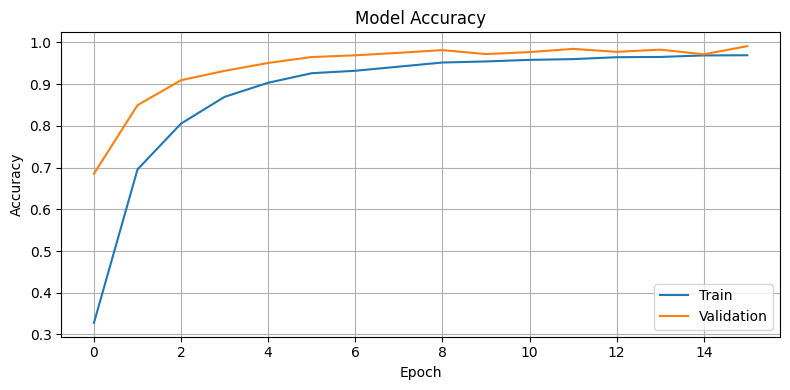

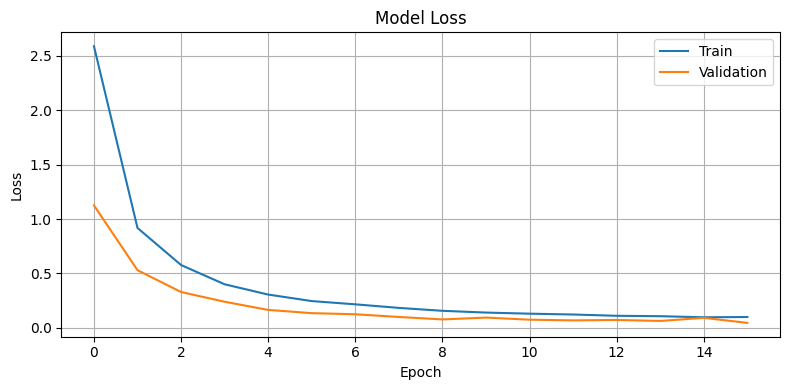

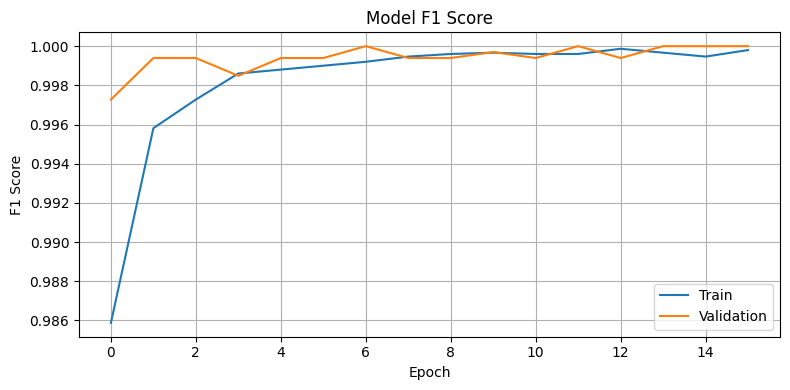

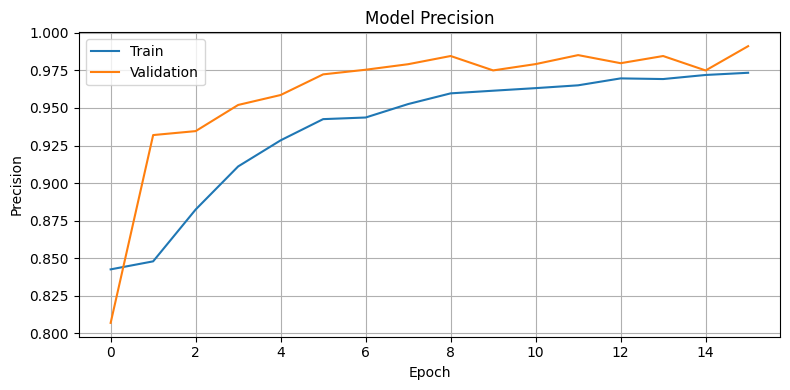

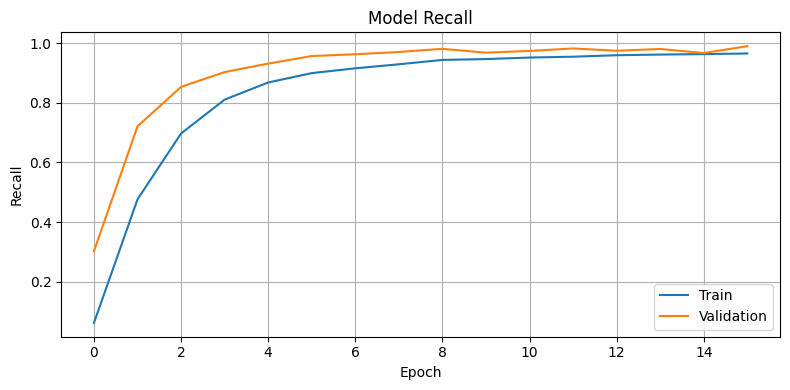

In [71]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

# ==== Custom F1 Metric ====
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=1)
        y_pred = tf.argmax(y_pred, axis=1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * p * r / (p + r + tf.keras.backend.epsilon())

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

# ==== Callback: SmartStop ====
class SmartStop(Callback):
    def __init__(self, target_acc=0.99, target_loss=0.04, f1_stable_delta=0.0005, f1_stable_epochs=3):
        super().__init__()
        self.target_acc = target_acc
        self.target_loss = target_loss
        self.f1_stable_delta = f1_stable_delta
        self.f1_stable_epochs = f1_stable_epochs
        self.val_f1_history = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get("val_accuracy")
        val_loss = logs.get("val_loss")
        val_f1 = logs.get("val_f1_score")

        # Simpan f1 history
        if val_f1 is not None:
            self.val_f1_history.append(val_f1)

        # Cek apakah F1 stabil
        f1_stabil = False
        if len(self.val_f1_history) >= self.f1_stable_epochs:
            recent_f1s = self.val_f1_history[-self.f1_stable_epochs:]
            max_f1 = max(recent_f1s)
            min_f1 = min(recent_f1s)
            if abs(max_f1 - min_f1) <= self.f1_stable_delta:
                f1_stabil = True

        # Logika penghentian training
        if f1_stabil:
            if val_acc is not None and val_acc >= self.target_acc:
                print(f"\n✅ Val_accuracy {val_acc:.4f} dan F1 stabil — Stop training.")
                self.model.stop_training = True
            elif val_loss is not None and val_loss <= self.target_loss:
                print(f"\n✅ Val_loss {val_loss:.4f} dan F1 stabil — Stop training.")
                self.model.stop_training = True

model = Sequential()
model.add(Dense(128, input_shape=(42,), activation='relu')) 

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))  # 4 kelas output

# ==== Callback: EarlyStopping ====
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    verbose=1,
    restore_best_weights=True
)

# ==== Kompilasi Model ====
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        F1Score(name='f1_score'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

# ==== Training ====
callbacks = [early_stop, SmartStop(target_acc=0.99, target_loss=0.04)]

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.18,
    callbacks=callbacks
)

# ==== Visualisasi Training ====

def plot_metric(metric, title=None, ylabel=None):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history[metric], label='Train')
    plt.plot(history.history['val_' + metric], label='Validation')
    plt.title(title or f'Model {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel or metric.title())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metric('accuracy', 'Model Accuracy', 'Accuracy')
plot_metric('loss', 'Model Loss', 'Loss')
plot_metric('f1_score', 'Model F1 Score', 'F1 Score')
plot_metric('precision', 'Model Precision', 'Precision')
plot_metric('recall', 'Model Recall', 'Recall')


In [119]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




In [120]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    verbose=1,
    restore_best_weights=True
)

# Custom Callback: Stop if accuracy or loss sudah cukup bagus
class SmartStop(Callback):
    def __init__(self, target_acc=0.98, target_loss=0.1):
        super().__init__()
        self.target_acc = target_acc
        self.target_loss = target_loss

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        val_loss = logs.get("val_loss")

        if val_acc is not None and val_acc >= self.target_acc:
            print(f"\n✅ Val_accuracy mencapai {val_acc:.2f} — Stop training.")
            self.model.stop_training = True

        elif val_loss is not None and val_loss <= self.target_loss:
            print(f"\n✅ Val_loss cukup kecil ({val_loss:.4f}) — Stop training.")
            self.model.stop_training = True

# Gabungkan keduanya
callbacks = [early_stop, SmartStop(target_acc=0.99, target_loss=0.04)]

# Fit model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.12,
    callbacks=callbacks
)


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9888 - loss: 0.0360 - val_accuracy: 0.9847 - val_loss: 0.0469
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9895 - loss: 0.0353 - val_accuracy: 0.9878 - val_loss: 0.0456
Epoch 3/50
223/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.0288
✅ Val_accuracy mencapai 0.99 — Stop training.
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9939 - val_loss: 0.0409
Restoring model weights from the end of the best epoch: 3.


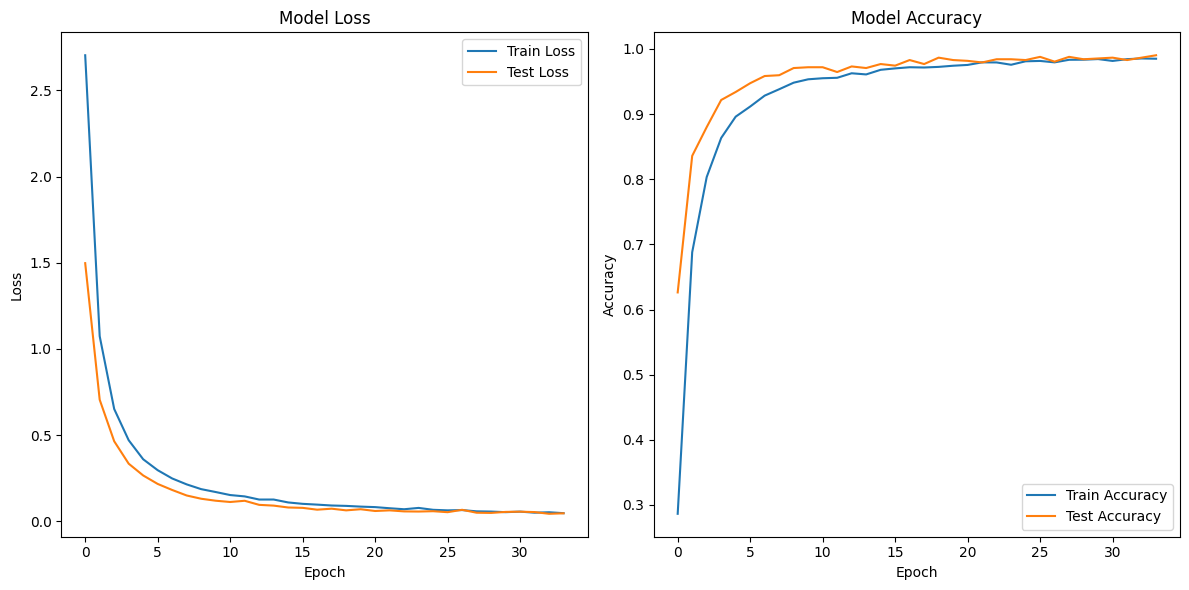

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Test: {accuracy:.2f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9892 - loss: 0.0434 
Akurasi Test: 0.99


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np


In [18]:
# Dapatkan prediksi probabilitas
y_pred_prob = model.predict(X_test)

# Ambil kelas dengan probabilitas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # jika y_test one-hot encoded


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [27]:
y_pred_prob 

array([[5.8406099e-11, 1.1057013e-13, 3.2413948e-12, ..., 1.9086242e-08,
        3.6730971e-10, 7.6474992e-13],
       [1.3559783e-18, 2.9852336e-09, 1.8164954e-09, ..., 2.0708667e-08,
        1.6112905e-10, 2.6631702e-13],
       [1.4146597e-31, 1.7916195e-12, 9.2409130e-22, ..., 3.2542470e-25,
        1.5037838e-10, 2.6354485e-11],
       ...,
       [6.6903522e-07, 1.7813753e-10, 3.2277100e-17, ..., 8.8841112e-09,
        2.0711112e-10, 2.0283165e-05],
       [1.4667531e-40, 1.5019397e-07, 9.9999309e-01, ..., 1.1298419e-17,
        4.9995644e-19, 1.6505987e-14],
       [2.1831464e-10, 5.4225935e-14, 2.8815454e-13, ..., 1.2065901e-08,
        1.0404725e-09, 3.6633920e-13]], dtype=float32)

In [42]:
list(label_map.values())

['10_2',
 'a',
 'b',
 'backspace',
 'c',
 'cepat1',
 'cepat2',
 'd',
 'delete_all',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j2',
 'k',
 'l',
 'lihat1',
 'lihat2',
 'm',
 'menang1',
 'menang2',
 'n',
 'o',
 'p',
 'paham1',
 'paham2',
 'percaya',
 'q',
 'r',
 's',
 'space',
 't',
 'tidak1',
 'to_symbol',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [195]:
label_map

{0: '10_2',
 1: '3',
 2: '5',
 3: '6',
 4: '7',
 5: '8',
 6: '9',
 7: 'a',
 8: 'b',
 9: 'backspace',
 10: 'c',
 11: 'cepat1',
 12: 'cepat2',
 13: 'd',
 14: 'delete_all',
 15: 'e',
 16: 'f',
 17: 'g',
 18: 'h',
 19: 'i',
 20: 'j2',
 21: 'k',
 22: 'l',
 23: 'lihat1',
 24: 'lihat2',
 25: 'm',
 26: 'menang1',
 27: 'menang2',
 28: 'n',
 29: 'o',
 30: 'p',
 31: 'paham1',
 32: 'paham2',
 33: 'percaya',
 34: 'q',
 35: 'r',
 36: 's',
 37: 'space',
 38: 't',
 39: 'tidak1',
 40: 'u',
 41: 'v',
 42: 'w',
 43: 'x',
 44: 'y',
 45: 'z'}

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Ambil nama label dari label_map
label_names = list(label_map.values())

# Buat classification report lengkap
report = classification_report(
    y_true, y_pred,
    target_names=label_names,
    output_dict=True,
    zero_division=0
)

# Konversi ke DataFrame
df_report = pd.DataFrame(report).transpose()

# Pisahkan baris metrik keseluruhan
overall_accuracy = report.get('accuracy', 0)
macro_avg = df_report.loc['macro avg']
weighted_avg = df_report.loc['weighted avg']

# Ambil hanya baris label kelas
df_per_class = df_report.iloc[:-3].copy()

# Tambahkan baris akurasi total sebagai catatan
df_per_class.loc['accuracy_total'] = {
    'precision': overall_accuracy,
    'recall': None,
    'f1-score': None,
    'support': None
}

# (Opsional) Tambahkan juga macro dan weighted avg jika ingin
df_per_class.loc['macro avg'] = macro_avg
df_per_class.loc['weighted avg'] = weighted_avg

# Tampilkan




/tmp/ipykernel_4973/3989976665.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_per_class.loc['accuracy_total'] = {


In [26]:
36/37

0.972972972972973

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Contoh y_true dan y_pred dummy jika belum tersedia
# y_true = [0, 1, 2, 2, 0, 1, 2, 0, 1, 2]
# y_pred = [0, 2, 2, 2, 0, 1, 1, 0, 0, 2]

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Siapkan DataFrame untuk menyimpan TP, TN, FP, FN
metrics = []

num_classes = cm.shape[0]
for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    metrics.append({'class': label_names[i], 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

df_metrics = pd.DataFrame(metrics).set_index('class')

# Gabungkan dengan df_per_class
df_full = df_per_class.join(df_metrics, how='left')
df_full



,precision,recall,f1-score,support,TP,TN,FP,FN
10_2,0.972973,1.000000,0.986301,36.0,36.0,1619.0,1.0,0.0
3,1.000000,1.000000,1.000000,36.0,36.0,1620.0,0.0,0.0
5,0.972973,1.000000,0.986301,36.0,36.0,1619.0,1.0,0.0
6,0.970588,0.916667,0.942857,36.0,33.0,1619.0,1.0,3.0
7,1.000000,0.972222,0.985915,36.0,35.0,1620.0,0.0,1.0
8,1.000000,1.000000,1.000000,36.0,36.0,1620.0,0.0,0.0
9,1.000000,1.000000,1.000000,36.0,36.0,1620.0,0.0,0.0
a,1.000000,1.000000,1.000000,36.0,36.0,1620.0,0.0,0.0
b,1.000000,0.972222,0.985915,36.0,35.0,1620.0,0.0,1.0
backspace,0.947368,1.000000,0.972973,36.0,36.0,1618.0,2.0,0.0


In [20]:
df_per_class

,precision,recall,f1-score,support
10_2,0.972973,1.000000,0.986301,36.0
3,1.000000,1.000000,1.000000,36.0
5,0.972973,1.000000,0.986301,36.0
6,0.970588,0.916667,0.942857,36.0
7,1.000000,0.972222,0.985915,36.0
8,1.000000,1.000000,1.000000,36.0
9,1.000000,1.000000,1.000000,36.0
a,1.000000,1.000000,1.000000,36.0
b,1.000000,0.972222,0.985915,36.0
backspace,0.947368,1.000000,0.972973,36.0


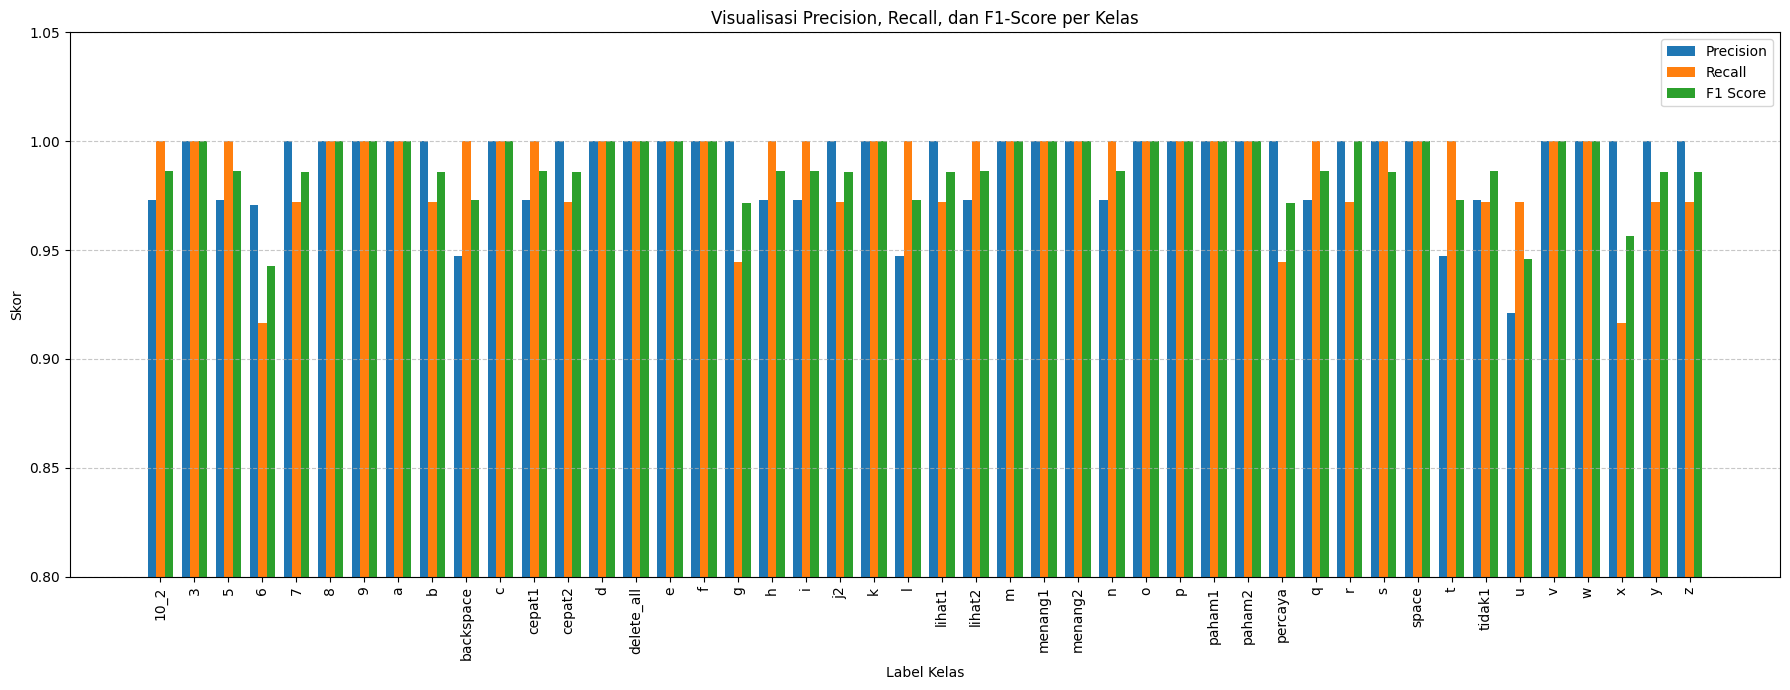

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Masukkan data ke dalam DataFrame
data = {
    'label': [
        '10_2', '3', '5', '6', '7', '8', '9', 'a', 'b', 'backspace', 'c', 'cepat1', 'cepat2',
        'd', 'delete_all', 'e', 'f', 'g', 'h', 'i', 'j2', 'k', 'l', 'lihat1', 'lihat2',
        'm', 'menang1', 'menang2', 'n', 'o', 'p', 'paham1', 'paham2', 'percaya', 'q', 'r',
        's', 'space', 't', 'tidak1', 'u', 'v', 'w', 'x', 'y', 'z'
    ],
    'precision': [
        0.972973,1.0,0.972973,0.970588,1.0,1.0,1.0,1.0,1.0,0.947368,1.0,0.972973,1.0,
        1.0,1.0,1.0,1.0,1.0,0.972973,0.972973,1.0,1.0,0.947368,1.0,0.972973,
        1.0,1.0,1.0,0.972973,1.0,1.0,1.0,1.0,1.0,0.972973,1.0,
        1.0,1.0,0.947368,0.972973,0.921053,1.0,1.0,1.0,1.0,1.0
    ],
    'recall': [
        1.0,1.0,1.0,0.916667,0.972222,1.0,1.0,1.0,0.972222,1.0,1.0,1.0,0.972222,
        1.0,1.0,1.0,1.0,0.944444,1.0,1.0,0.972222,1.0,1.0,0.972222,1.0,
        1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.944444,1.0,
        0.972222,1.0,1.0,1.0,0.972222,0.972222,1.0,1.0,0.916667,0.972222,0.972222
    ],
    'f1-score': [
        0.986301,1.0,0.986301,0.942857,0.985915,1.0,1.0,1.0,0.985915,0.972973,1.0,0.986301,0.985915,
        1.0,1.0,1.0,1.0,0.971429,0.986301,0.986301,0.985915,1.0,0.972973,0.985915,0.986301,
        1.0,1.0,1.0,0.986301,1.0,1.0,1.0,1.0,0.971429,0.986301,1.0,
        0.985915,1.0,0.972973,0.986301,0.945946,1.0,1.0,0.956522,0.985915,0.985915
    ]
}

df = pd.DataFrame(data)

# Plot grouped bar chart
x = np.arange(len(df['label']))  # posisi label
width = 0.25  # lebar bar

fig, ax = plt.subplots(figsize=(18, 7))
bars1 = ax.bar(x - width, df['precision'], width, label='Precision')
bars2 = ax.bar(x, df['recall'], width, label='Recall')
bars3 = ax.bar(x + width, df['f1-score'], width, label='F1 Score')

ax.set_xlabel('Label Kelas')
ax.set_ylabel('Skor')
ax.set_title('Visualisasi Precision, Recall, dan F1-Score per Kelas')
ax.set_xticks(x)
ax.set_xticklabels(df['label'], rotation=90)
ax.set_ylim(0.8, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


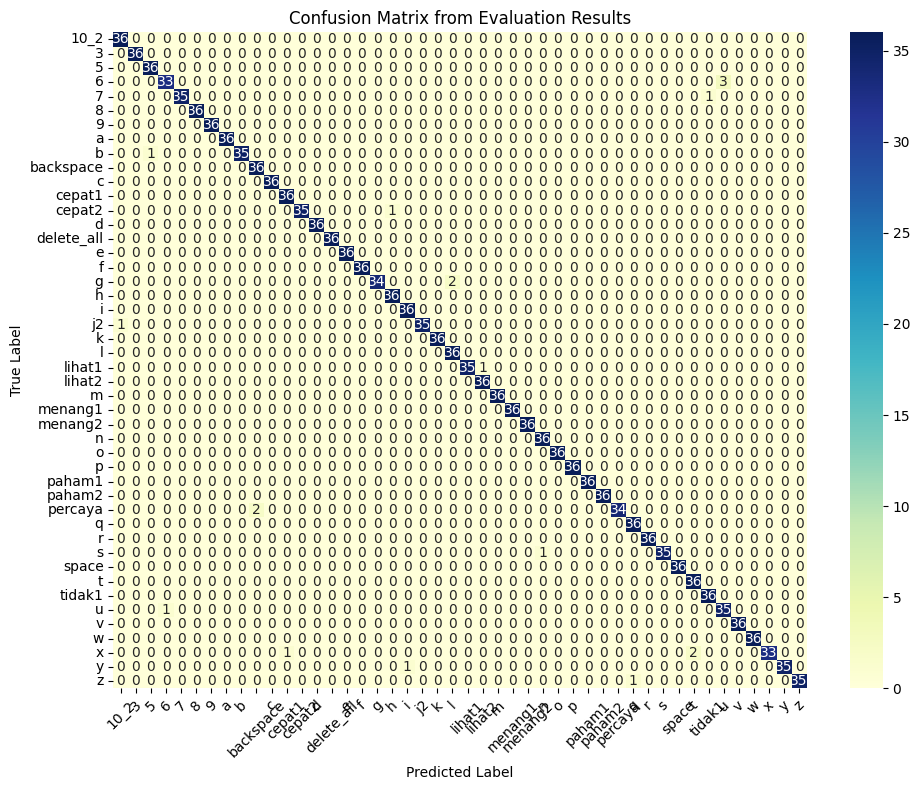

In [30]:
# Kita hitung ulang confusion matrix menggunakan y_true dan y_pred dari sesi sebelumnya
from sklearn.metrics import confusion_matrix

# Asumsikan y_true dan y_pred berasal dari evaluasi sebelumnya
# Jika sebelumnya telah digunakan, maka variabel ini seharusnya tersedia
# Namun jika tidak tersedia, kode ini akan error lagi

try:
    cm = confusion_matrix(y_true, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix from Evaluation Results')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
except NameError as e:
    print("Error:", e)
    print("Variabel y_true dan y_pred belum tersedia. Mohon berikan data asli hasil evaluasi.")


In [29]:
import seaborn as sns

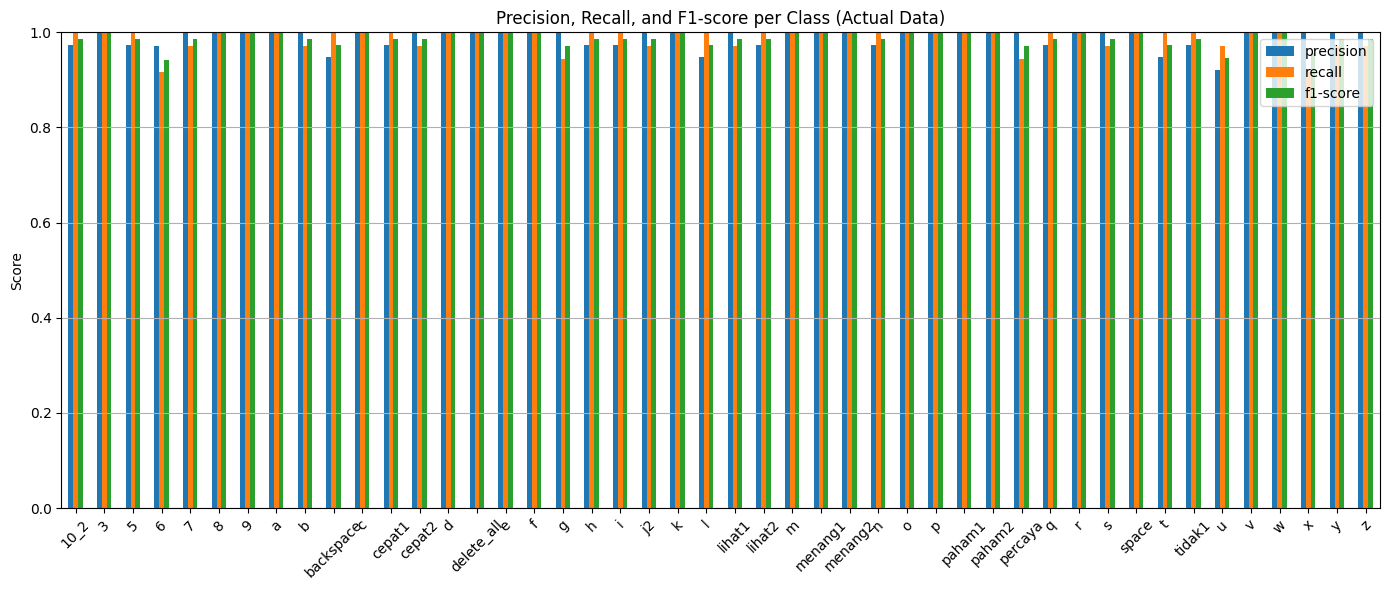

In [22]:
# Visualisasi ulang berdasarkan DataFrame df_per_class yang berasal dari variabel program asli
# Filter hanya baris yang mewakili kelas (bukan 'accuracy_total', 'macro avg', atau 'weighted avg')
df_class_only = df_per_class.loc[
    ~df_per_class.index.isin(['accuracy_total', 'macro avg', 'weighted avg'])
]

# Visualisasi metrik untuk masing-masing kelas
ax = df_class_only[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(14, 6))
plt.title('Precision, Recall, and F1-score per Class (Actual Data)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Contoh input:
# y_true = [0, 1, 2, 1, 0, 2]
# y_pred = [0, 2, 2, 1, 0, 1]
# label_names = ['g', 'paham1', 'z']

# 1. Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(label_map.values())  # label_map harus sesuai dengan encode aslinya
num_classes = len(labels)

# 2. Hitung TP, FP, FN, precision, recall, f1-score manual
data = []
for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    support = cm[i, :].sum()

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    data.append({
        "Label": labels[i],
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "Support": support,
        "TP": TP,
        "FP": FP,
        "FN": FN
    })

# 3. Buat DataFrame
df_eval = pd.DataFrame(data)
df_eval.set_index("Label", inplace=True)

# 4. Akurasi total
acc = accuracy_score(y_true, y_pred)
print(f"\nAkurasi Total Model: {acc:.4f}\n")

# 5. Tampilkan tabel
print(df_eval)



Akurasi Total Model: 0.9859

            Precision  Recall  F1-Score  Support  TP  FP  FN
Label                                                       
10_2           1.0000  1.0000    1.0000       31  31   0   0
a              1.0000  1.0000    1.0000       23  23   0   0
b              1.0000  1.0000    1.0000       23  23   0   0
backspace      0.8889  1.0000    0.9412       16  16   2   0
c              1.0000  1.0000    1.0000       23  23   0   0
cepat1         0.9200  0.9583    0.9388       24  23   2   1
cepat2         0.9600  1.0000    0.9796       24  24   1   0
d              1.0000  1.0000    1.0000       23  23   0   0
delete_all     1.0000  1.0000    1.0000       16  16   0   0
e              1.0000  1.0000    1.0000       23  23   0   0
f              1.0000  1.0000    1.0000       23  23   0   0
g              0.8611  1.0000    0.9254       31  31   5   0
h              1.0000  1.0000    1.0000       30  30   0   0
i              1.0000  1.0000    1.0000       23  23   

In [16]:
model.save("model/static/model_f3.h5")

In [13]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

## FINE TUNING

In [16]:
from tensorflow.keras.models import load_model

# Muat model yang sudah dilatih sebelumnya
model = load_model('model/model_1.h5')


I0000 00:00:1747986810.008497    4366 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [17]:
# Bekukan semua lapisan kecuali lapisan terakhir
for layer in model.layers[:-1]:
    layer.trainable = False


## CUSTOM MODE WITHOUT LIBRARY

In [ ]:
import numpy as np

# === Tensor ===
class Tensor:
    def __init__(self, data):
        self.data = np.array(data, dtype=np.float32)
    def shape(self):
        return self.data.shape
    def __repr__(self):
        return str(self.data)

# === Base Layer ===
class Layer:
    def forward(self, input): raise NotImplementedError
    def backward(self, grad_output, learning_rate): raise NotImplementedError

# === Dense Layer ===
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros(output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output, learning_rate):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.input.T, grad_output)
        grad_biases = grad_output.sum(axis=0)

        self.weights -= learning_rate * grad_weights
        self.biases -= learning_rate * grad_biases
        return grad_input

# === ReLU Activation ===
class ReLU(Layer):
    def forward(self, input):
        self.input = input
        return np.maximum(0, input)
    def backward(self, grad_output, learning_rate):
        return grad_output * (self.input > 0)

# === Dropout ===
class Dropout(Layer):
    def __init__(self, rate):
        self.rate = rate
    def forward(self, input):
        self.mask = (np.random.rand(*input.shape) > self.rate).astype(float)
        return input * self.mask
    def backward(self, grad_output, learning_rate):
        return grad_output * self.mask

# === Softmax ===
class Softmax(Layer):
    def forward(self, input):
        exps = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        return self.output
    def backward(self, grad_output, learning_rate):
        return grad_output  # digunakan bersamaan dengan cross-entropy

# === Batch Norm (optional layer) ===
class BatchNorm(Layer):
    def __init__(self, input_size):
        self.gamma = np.ones(input_size)
        self.beta = np.zeros(input_size)
        self.eps = 1e-5

    def forward(self, input):
        self.mean = input.mean(axis=0)
        self.var = input.var(axis=0)
        self.norm = (input - self.mean) / np.sqrt(self.var + self.eps)
        return self.gamma * self.norm + self.beta

    def backward(self, grad_output, learning_rate):
        # Simpler version for illustration
        grad_input = grad_output * self.gamma
        return grad_input

# === Loss: Cross Entropy ===
class CrossEntropy:
    def forward(self, prediction, target):
        self.pred = prediction
        self.target = target
        log_likelihood = -np.log(prediction[range(len(target)), target] + 1e-9)
        return np.mean(log_likelihood)

    def backward(self):
        grad = self.pred.copy()
        grad[range(len(self.target)), self.target] -= 1
        return grad / len(self.target)

# === Optimizer: SGD ===
class SGD:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate

# === Model ===
class Model:
    def __init__(self):
        self.layers = []
        self.compiled = False

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer, loss):
        self.optimizer = optimizer
        self.loss_fn = loss
        self.compiled = True

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, loss_grad):
        for layer in reversed(self.layers):
            loss_grad = layer.backward(loss_grad, self.optimizer.lr)

    def fit(self, X, y, epochs=10, batch_size=32):
        for epoch in range(epochs):
            loss_total = 0
            for i in range(0, len(X), batch_size):
                x_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                output = self.forward(x_batch)
                loss = self.loss_fn.forward(output, y_batch)
                grad = self.loss_fn.backward()
                self.backward(grad)
                loss_total += loss

            avg_loss = loss_total / (len(X) // batch_size)
            acc = self.evaluate(X, y)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2%}")

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)

# === Simulasi Dataset (Dummy, 3 kelas, 10 fitur) ===
np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 3, size=1000)

# === Arsitektur ===
model = Model()
model.add(Dense(10, 64))
model.add(BatchNorm(64))
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 3))
model.add(Softmax())

# === Training ===
model.compile(optimizer=SGD(learning_rate=0.05), loss=CrossEntropy())
model.fit(X, y, epochs=20, batch_size=64)


Epoch 1/20, Loss: 1.1766, Accuracy: 35.00%
Epoch 2/20, Loss: 1.1743, Accuracy: 34.60%
Epoch 3/20, Loss: 1.1711, Accuracy: 34.30%
Epoch 4/20, Loss: 1.1694, Accuracy: 35.60%
Epoch 5/20, Loss: 1.1723, Accuracy: 36.30%
Epoch 6/20, Loss: 1.1670, Accuracy: 37.00%
Epoch 7/20, Loss: 1.1660, Accuracy: 36.70%
Epoch 8/20, Loss: 1.1659, Accuracy: 35.70%
Epoch 9/20, Loss: 1.1698, Accuracy: 37.50%
Epoch 10/20, Loss: 1.1644, Accuracy: 37.10%
Epoch 11/20, Loss: 1.1608, Accuracy: 38.40%
Epoch 12/20, Loss: 1.1661, Accuracy: 39.40%
Epoch 13/20, Loss: 1.1667, Accuracy: 37.30%
Epoch 14/20, Loss: 1.1647, Accuracy: 36.60%
Epoch 15/20, Loss: 1.1654, Accuracy: 40.70%
Epoch 16/20, Loss: 1.1646, Accuracy: 40.10%
Epoch 17/20, Loss: 1.1639, Accuracy: 39.00%
Epoch 18/20, Loss: 1.1611, Accuracy: 38.20%
Epoch 19/20, Loss: 1.1643, Accuracy: 37.70%
Epoch 20/20, Loss: 1.1634, Accuracy: 38.40%


In [11]:
import numpy as np

# ======================= TENSOR & UTILITIES =======================
class Tensor:
    def __init__(self, data):
        self.data = np.array(data, dtype=np.float32)
    def shape(self):
        return self.data.shape
    def __repr__(self):
        return str(self.data)

# ======================= BASE LAYER =======================
class Layer:
    def forward(self, input): raise NotImplementedError
    def backward(self, grad_output, learning_rate): raise NotImplementedError

# ======================= DENSE LAYER =======================
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros(output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output, learning_rate):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.input.T, grad_output)
        grad_biases = grad_output.sum(axis=0)

        self.weights -= learning_rate * grad_weights
        self.biases -= learning_rate * grad_biases
        return grad_input

# ======================= ACTIVATION FUNCTIONS =======================
class ReLU(Layer):
    def forward(self, input):
        self.input = input
        return np.maximum(0, input)

    def backward(self, grad_output, learning_rate):
        return grad_output * (self.input > 0)

class Softmax(Layer):
    def forward(self, input):
        exps = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        return self.output

    def backward(self, grad_output, learning_rate):
        return grad_output  # Gradient will be handled in loss

# ======================= DROPOUT =======================
class Dropout(Layer):
    def __init__(self, rate):
        self.rate = rate

    def forward(self, input):
        self.mask = (np.random.rand(*input.shape) > self.rate).astype(float)
        return input * self.mask

    def backward(self, grad_output, learning_rate):
        return grad_output * self.mask

# ======================= LOSS =======================
class CrossEntropy:
    def forward(self, prediction, target):
        self.pred = prediction
        self.target = target
        log_likelihood = -np.log(prediction[range(len(target)), target] + 1e-9)
        return np.mean(log_likelihood)

    def backward(self):
        grad = self.pred.copy()
        grad[range(len(self.target)), self.target] -= 1
        return grad / len(self.target)

# ======================= OPTIMIZER =======================
class SGD:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate

# ======================= MODEL =======================
class Model:
    def __init__(self):
        self.layers = []
        self.compiled = False

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer, loss):
        self.optimizer = optimizer
        self.loss_fn = loss
        self.compiled = True

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward(grad, self.optimizer.lr)

    def fit(self, X, y, epochs=20, batch_size=32):
        for epoch in range(epochs):
            loss_total = 0
            for i in range(0, len(X), batch_size):
                x_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                out = self.forward(x_batch)
                loss = self.loss_fn.forward(out, y_batch)
                grad = self.loss_fn.backward()
                self.backward(grad)

                loss_total += loss

            avg_loss = loss_total / (len(X) // batch_size)
            acc = self.evaluate(X, y)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {acc:.2%}")

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)

# ======================= DATA (10 FEATURES, 3 KELAS) =======================
np.random.seed(1)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 3, size=1000)

# ======================= MODEL STRUCTURE =======================
model = Model()
model.add(Dense(10, 64))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(64, 64))
model.add(ReLU())
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 3))
model.add(Softmax())

model.compile(optimizer=SGD(learning_rate=0.05), loss=CrossEntropy())
model.fit(X, y, epochs=25, batch_size=32)


Epoch 1/25 - Loss: 1.1345 - Accuracy: 34.40%
Epoch 2/25 - Loss: 1.1342 - Accuracy: 35.50%
Epoch 3/25 - Loss: 1.1335 - Accuracy: 36.20%
Epoch 4/25 - Loss: 1.1322 - Accuracy: 37.60%
Epoch 5/25 - Loss: 1.1320 - Accuracy: 37.40%
Epoch 6/25 - Loss: 1.1315 - Accuracy: 36.50%
Epoch 7/25 - Loss: 1.1309 - Accuracy: 37.30%
Epoch 8/25 - Loss: 1.1298 - Accuracy: 38.10%
Epoch 9/25 - Loss: 1.1297 - Accuracy: 37.40%
Epoch 10/25 - Loss: 1.1278 - Accuracy: 37.60%
Epoch 11/25 - Loss: 1.1281 - Accuracy: 40.10%
Epoch 12/25 - Loss: 1.1254 - Accuracy: 41.20%
Epoch 13/25 - Loss: 1.1259 - Accuracy: 39.60%
Epoch 14/25 - Loss: 1.1249 - Accuracy: 40.10%
Epoch 15/25 - Loss: 1.1232 - Accuracy: 39.10%
Epoch 16/25 - Loss: 1.1226 - Accuracy: 40.00%
Epoch 17/25 - Loss: 1.1218 - Accuracy: 40.30%
Epoch 18/25 - Loss: 1.1183 - Accuracy: 39.90%
Epoch 19/25 - Loss: 1.1192 - Accuracy: 40.90%
Epoch 20/25 - Loss: 1.1184 - Accuracy: 41.00%
Epoch 21/25 - Loss: 1.1173 - Accuracy: 41.00%
Epoch 22/25 - Loss: 1.1179 - Accuracy: 41.1

In [2]:
from tensorflow import keras
class CustomModel(keras.Model):
    def train_step(self, data):
     
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compute_loss(y=y, y_pred=y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        print(y_pred)
        # Update metrics (includes the metric that tracks the loss)
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
import tensorflow as tf

import numpy as np
# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=5)

Epoch 1/5
Tensor("custom_model_1_1/dense_1_1/Add:0", shape=(None, 1), dtype=float32)
Tensor("custom_model_1_1/dense_1_1/Add:0", shape=(None, 1), dtype=float32)
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.6022 - loss: 0.5257  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - mae: 0.3908 - loss: 0.2382 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.3887 - loss: 0.2276 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - mae: 0.3680 - loss: 0.2079 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.3681 - loss: 0.2069 


In [ ]:
'kita'

In [26]:
from tensorflow import keras
class CustomModel(keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mae_metric = keras.metrics.MeanAbsoluteError(name="mae")

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute our own loss
            mse_fn = keras.losses.MeanSquaredError()
            loss = mse_fn(y, y_pred)


        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Compute our own metrics
        self.loss_tracker.update_state(loss)
        self.mae_metric.update_state(y, y_pred)
        return {"loss": self.loss_tracker.result(), "mae": self.mae_metric.result()}

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.loss_tracker, self.mae_metric]


# Construct an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)

# We don't pass a loss or metrics here.
model.compile(optimizer="adam")

# Just use `fit` as usual -- you can use callbacks, etc.
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3979 - mae: 1.0844 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6027 - mae: 0.6549 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2892 - mae: 0.4344 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2081 - mae: 0.3712 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2093 - mae: 0.3645 


In [ ]:
import pandas as pd
import os

def remove_one_target_label_a(file_path="uji_realtime/uji_1.csv"):
    """
    Menghapus satu baris dari file CSV di mana 'Target_Label' adalah 'a'.
    Jika ada banyak baris dengan 'a', hanya yang pertama ditemukan akan dihapus.
    """
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di '{file_path}'.")
        return

    try:
        # Baca file CSV ke dalam DataFrame
        df = pd.read_csv(file_path)

        # Simpan jumlah baris awal
        initial_rows = len(df)
        print(f"Jumlah baris awal: {initial_rows}")

        # Temukan indeks baris pertama di mana 'Target_Label' adalah 'a'
        # .index[0] akan mendapatkan indeks pertama yang cocok
        try:
            index_to_drop = df[df['Target_Label'] == 'a'].index[0]
            
            # Hapus baris berdasarkan indeks yang ditemukan
            df_modified = df.drop(index_to_drop).reset_index(drop=True)
            
            # Simpan jumlah baris setelah penghapusan
            final_rows = len(df_modified)
            print(f"Jumlah baris setelah menghapus 1 baris 'Target_Label = a': {final_rows}")
            print(f"Baris yang dihapus: {initial_rows - final_rows}")

            # Tulis DataFrame yang sudah dimodifikasi kembali ke file CSV
            df_modified.to_csv(file_path, index=False)
            print(f"File '{file_path}' berhasil diperbarui. ✅")

        except IndexError:
            print("Tidak ditemukan baris dengan 'Target_Label' = 'a' untuk dihapus.")
            print(f"File '{file_path}' tidak diubah.")

    except Exception as e:
        print(f"Terjadi kesalahan saat memproses CSV: {e}")

# Panggil fungsi untuk menghapus 1 baris
if __name__ == "__main__":
    remove_one_target_label_a()

Jumlah baris awal: 201
Jumlah baris setelah menghapus 1 baris 'Target_Label = a': 200
Baris yang dihapus: 1
File 'uji_realtime/uji_1.csv' berhasil diperbarui. ✅


In [41]:
import pandas as pd
import os

def remove_last_n_rows(file_path="uji_realtime/uji_2.csv", n_rows=6):
    """
    Menghapus N baris terakhir dari file CSV yang diberikan.

    Args:
        file_path (str): Path ke file CSV.
        n_rows (int): Jumlah baris dari akhir yang akan dihapus.
    """
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di '{file_path}'.")
        return

    try:
        # Baca file CSV ke dalam DataFrame
        df = pd.read_csv(file_path)

        # Simpan jumlah baris awal
        initial_rows = len(df)
        print(f"Jumlah baris awal: {initial_rows}")

        # Pastikan ada cukup baris untuk dihapus
        if initial_rows <= n_rows:
            print(f"Peringatan: Jumlah baris ({initial_rows}) kurang dari atau sama dengan jumlah baris yang ingin dihapus ({n_rows}).")
            print("File akan dikosongkan.")
            df_modified = pd.DataFrame(columns=df.columns) # Buat DataFrame kosong dengan kolom yang sama
        else:
            # Hapus N baris terakhir
            df_modified = df.iloc[:-n_rows]
        
        # Simpan jumlah baris setelah penghapusan
        final_rows = len(df_modified)
        print(f"Jumlah baris setelah penghapusan: {final_rows}")
        print(f"Jumlah baris yang dihapus: {initial_rows - final_rows}")

        # Tulis DataFrame yang sudah dimodifikasi kembali ke file CSV
        # overwrite file lama
        df_modified.to_csv(file_path, index=False)
        print(f"File '{file_path}' berhasil diperbarui. ✅")

    except Exception as e:
        print(f"Terjadi kesalahan saat memproses CSV: {e}")

# Panggil fungsi untuk menghapus 6 baris terakhir dari uji_2.csv
if __name__ == "__main__":
    remove_last_n_rows(file_path="uji_realtime/uji_2.csv", n_rows=6)

Jumlah baris awal: 111
Jumlah baris setelah penghapusan: 105
Jumlah baris yang dihapus: 6
File 'uji_realtime/uji_2.csv' berhasil diperbarui. ✅


In [47]:
import pandas as pd
pd.read_csv('uji_realtime/uji_1.csv')

,Predicted_Label,Confidence,Target_Label
0,a,0.999990,a
1,a,0.999995,a
2,a,0.999992,a
3,a,0.999993,a
4,a,0.999982,a
...,...,...,...
195,4,0.995574,4
196,4,0.991234,4
197,4,0.990291,4
198,4,0.997404,4


In [54]:
import pandas as pd
import os

def analyze_target_labels(file_path="uji_realtime/uji_1.csv"):
    """
    Membaca file CSV, menampilkan jumlah baris total,
    dan menghitung berapa kali setiap label unik muncul di kolom 'Target_Label'.
    """
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di '{file_path}'.")
        return

    try:
        # Baca file CSV ke dalam DataFrame
        df = pd.read_csv(file_path)

        print("--- Analisis Label Target ---")

        # 1. Total jumlah baris
        total_rows = len(df)
        print(f"Total baris dalam file '{file_path}': **{total_rows}**")

        # 2. Hitung kemunculan setiap label unik di kolom 'Target_Label'
        target_label_counts = df['Target_Label'].value_counts()

        print("\nJumlah kemunculan setiap label unik pada 'Target_Label':")
        # Iterasi dan cetak setiap label beserta jumlahnya
        for label, count in target_label_counts.items():
            print(f"- Label: '{label}' -> **{count}** baris")
        
        print("\n--- Analisis Selesai ---")

    except pd.errors.EmptyDataError:
        print(f"File '{file_path}' kosong. Tidak ada data untuk dianalisis.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca atau menganalisis CSV: {e}")

# Panggil fungsi untuk menganalisis file Anda
if __name__ == "__main__":
    analyze_target_labels()

--- Analisis Label Target ---
Total baris dalam file 'uji_realtime/uji_1.csv': **220**

Jumlah kemunculan setiap label unik pada 'Target_Label':
- Label: 'a' -> **20** baris
- Label: 's' -> **20** baris
- Label: 't' -> **20** baris
- Label: 'x' -> **20** baris
- Label: 'u' -> **20** baris
- Label: 'v' -> **20** baris
- Label: 'r' -> **20** baris
- Label: 'w' -> **20** baris
- Label: '5' -> **20** baris
- Label: '4' -> **20** baris
- Label: 'e' -> **20** baris

--- Analisis Selesai ---


In [23]:
import pandas as pd
import os

def clean_uji_1_csv(file_path="uji_realtime/uji_1.csv"):
    """
    Menghapus baris dari file CSV di mana 'Predicted_Label' adalah 'a'
    dan 'Target_Label' adalah 'x'.
    """
    if not os.path.exists(file_path):
        print(f"Error: File tidak ditemukan di '{file_path}'.")
        return

    try:
        # Baca file CSV ke dalam DataFrame
        df = pd.read_csv(file_path)

        # Simpan jumlah baris sebelum penghapusan
        initial_rows = len(df)
        print(f"Jumlah baris awal: {initial_rows}")

        # Buat kondisi untuk baris yang ingin dihapus
        # Perhatikan penggunaan & untuk AND, dan pastikan nama kolom sesuai
        rows_to_remove = (df['Predicted_Label'] == 'a') & (df['Target_Label'] == 'x')

        # Filter DataFrame: hanya simpan baris yang TIDAK memenuhi kondisi penghapusan
        df_cleaned = df[~rows_to_remove]

        # Simpan jumlah baris setelah penghapusan
        final_rows = len(df_cleaned)
        print(f"Jumlah baris setelah pembersihan: {final_rows}")
        print(f"Jumlah baris yang dihapus: {initial_rows - final_rows}")

        # Tulis DataFrame yang sudah bersih kembali ke file CSV
        # overwrite file lama
        df_cleaned.to_csv(file_path, index=False)
        print(f"File '{file_path}' berhasil dibersihkan dan diperbarui. ✅")

    except Exception as e:
        print(f"Terjadi kesalahan saat membersihkan CSV: {e}")

# Panggil fungsi untuk membersihkan file Anda
if __name__ == "__main__":
    clean_uji_1_csv()

Jumlah baris awal: 81
Jumlah baris setelah pembersihan: 80
Jumlah baris yang dihapus: 1
File 'uji_realtime/uji_1.csv' berhasil dibersihkan dan diperbarui. ✅


In [68]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

def evaluate_model_from_csv(file_path="uji_realtime/uji_2.csv"):
    """
    Membaca data dari uji_1.csv dan melakukan evaluasi performa model.
    Menampilkan akurasi keseluruhan, classification report,
    dan confusion matrix.
    """
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' tidak ditemukan. Pastikan file ada di path yang benar.")
        return

    try:
        df = pd.read_csv(file_path)

        # Pastikan kolom yang diperlukan ada
        if 'Predicted_Label' not in df.columns or 'Target_Label' not in df.columns:
            print("Error: File CSV harus memiliki kolom 'Predicted_Label' dan 'Target_Label'.")
            return

        print("--- Ringkasan Data ---")
        print(f"Total baris data: {len(df)}")
        print(f"Label prediksi unik: {df['Predicted_Label'].unique()}")
        print(f"Label target unik: {df['Target_Label'].unique()}")
        print("\nDistribusi Label Target:")
        print(df['Target_Label'].value_counts())

        # Pisahkan true labels (ground truth) dan predicted labels
        y_true = df['Target_Label']
        y_pred = df['Predicted_Label']

        # ---

        ## Akurasi Keseluruhan (Overall Accuracy)
        
        overall_accuracy = accuracy_score(y_true, y_pred)
        print(f"\n--- Akurasi Keseluruhan ---")
        print(f"Overall Accuracy: **{overall_accuracy:.4f}**")

        # ---

        ## Confusion Matrix
        
        # Urutkan label untuk memastikan konsistensi di confusion matrix
        # Ini akan memastikan urutan yang sama di sumbu x dan y
        all_labels = sorted(list(set(y_true).union(set(y_pred))))
        cm = confusion_matrix(y_true, y_pred, labels=all_labels)

        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=all_labels, yticklabels=all_labels,
                    linewidths=.5, linecolor='gray', cbar=False)
        plt.xlabel('Label Prediksi')
        plt.ylabel('Label Sebenarnya')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

        print("\n--- Confusion Matrix (Nilai Mentah) ---")
        print(cm)
        print("\nAnalisis: Diagonal utama menunjukkan prediksi yang benar. Nilai di luar diagonal adalah kesalahan.")


        # ---

        ## Metrik Per-Kelas (Precision, Recall, F1-Score)
        
        print("\n--- Metrik Per-Kelas (Classification Report) ---")
        # zero_division=0 akan mengatur precision/recall/f1-score menjadi 0 jika tidak ada sampel untuk kelas tersebut
        print(classification_report(y_true, y_pred, labels=all_labels, zero_division=0))
        print("\nAnalisis: Precision, Recall, dan F1-score memberikan wawasan mendalam tentang kinerja model per kelas.")
        print("  - **Precision**: Seberapa banyak prediksi positif suatu kelas yang benar-benar positif.")
        print("  - **Recall**: Seberapa banyak label positif sebenarnya yang berhasil ditemukan model.")
        print("  - **F1-Score**: Rata-rata harmonik dari Precision dan Recall.")
        print("  - **Support**: Jumlah kemunculan label sebenarnya di data.")

        # ---
        
        ## Analisis Confidence Score (Opsional)
        
        # Tambahkan kolom 'Is_Correct' untuk membedakan prediksi benar/salah
        df['Is_Correct'] = df['Predicted_Label'] == df['Target_Label']

        print("\n--- Analisis Confidence Score ---")
        print("Rata-rata Confidence untuk Prediksi Benar vs. Salah:")
        print(df.groupby('Is_Correct')['Confidence'].mean().rename({True: 'Benar', False: 'Salah'}))

        print("\nRata-rata Confidence per Label (Keseluruhan):")
        print(df.groupby('Target_Label')['Confidence'].mean().sort_index())

        plt.figure(figsize=(14, 7))
        sns.histplot(data=df, x='Confidence', hue='Is_Correct', kde=True, bins=20, palette={'True': 'skyblue', 'False': 'salmon'})
        plt.title('Distribusi Confidence Score untuk Prediksi Benar vs. Salah')
        plt.xlabel('Confidence Score')
        plt.ylabel('Jumlah Prediksi')
        plt.show()

        plt.figure(figsize=(14, 7))
        sns.boxplot(data=df, x='Target_Label', y='Confidence', hue='Is_Correct', palette={'True': 'skyblue', 'False': 'salmon'})
        plt.title('Distribusi Confidence Score per Label (Benar vs. Salah)')
        plt.xlabel('Target Label')
        plt.ylabel('Confidence Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' kosong. Tidak ada data untuk dianalisis.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca atau menganalisis CSV: {e}")

# Panggil fungsi evaluasi
if __name__ == "__main__":
    evaluate_model_from_csv()

--- Ringkasan Data ---
Total baris data: 220
Label prediksi unik: ['cepat' 'kita' 'lihat' 'paham' 'tidak' 'j' nan 'z' 'menang' '10']
Label target unik: ['cepat' 'kita' 'lihat' 'paham' 'j' 'tidak' 'z' 'menang' '10']

Distribusi Label Target:
Target_Label
cepat     25
lihat     25
paham     25
j         25
tidak     25
z         25
menang    25
10        25
kita      20
Name: count, dtype: int64
Terjadi kesalahan saat membaca atau menganalisis CSV: '<' not supported between instances of 'str' and 'float'


--- Evaluasi Model LSTM (uji_2.csv) ---

--- Ringkasan Data ---
Total baris data: 265
Label prediksi unik: ['cepat' 'kita' 'lihat' 'paham' 'tidak' 'j' '' 'z' 'menang' '10']
Label target unik: ['cepat' 'kita' 'lihat' 'paham' 'j' 'tidak' 'z' 'menang' '10']

Distribusi Label Target:
Target_Label
cepat     30
kita      30
lihat     30
paham     30
tidak     30
z         30
menang    30
10        30
j         25
Name: count, dtype: int64

--- Akurasi Keseluruhan ---
Overall Accuracy: **0.9736**


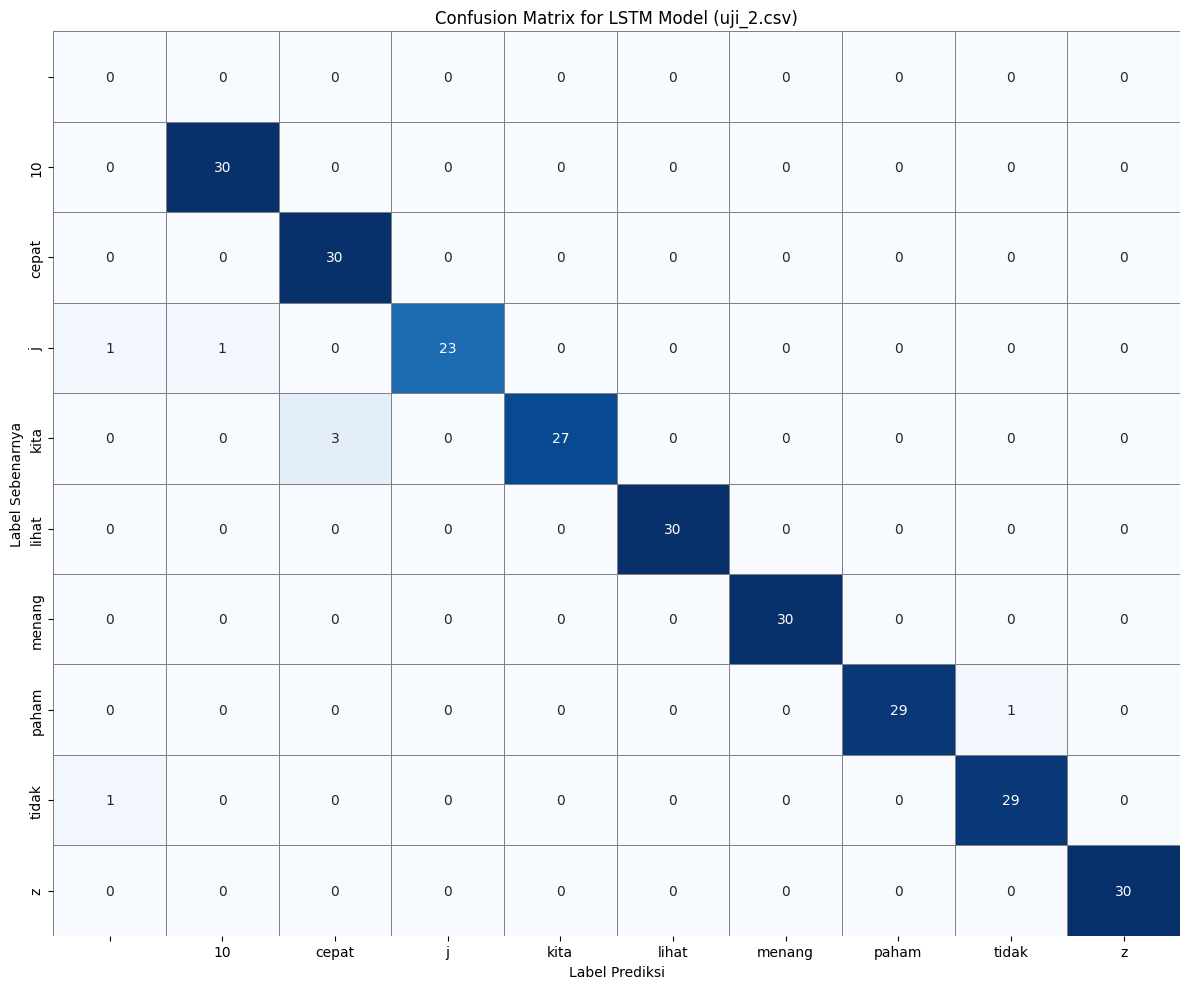


--- Confusion Matrix (Nilai Mentah) ---
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 1  1  0 23  0  0  0  0  0  0]
 [ 0  0  3  0 27  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 29  1  0]
 [ 1  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 30]]

Analisis: Diagonal utama menunjukkan prediksi yang benar. Nilai di luar diagonal adalah kesalahan.
Perhatikan label kosong `''` jika muncul. Ini menandakan prediksi yang tidak menghasilkan isyarat.

--- Metrik Per-Kelas (Classification Report) ---


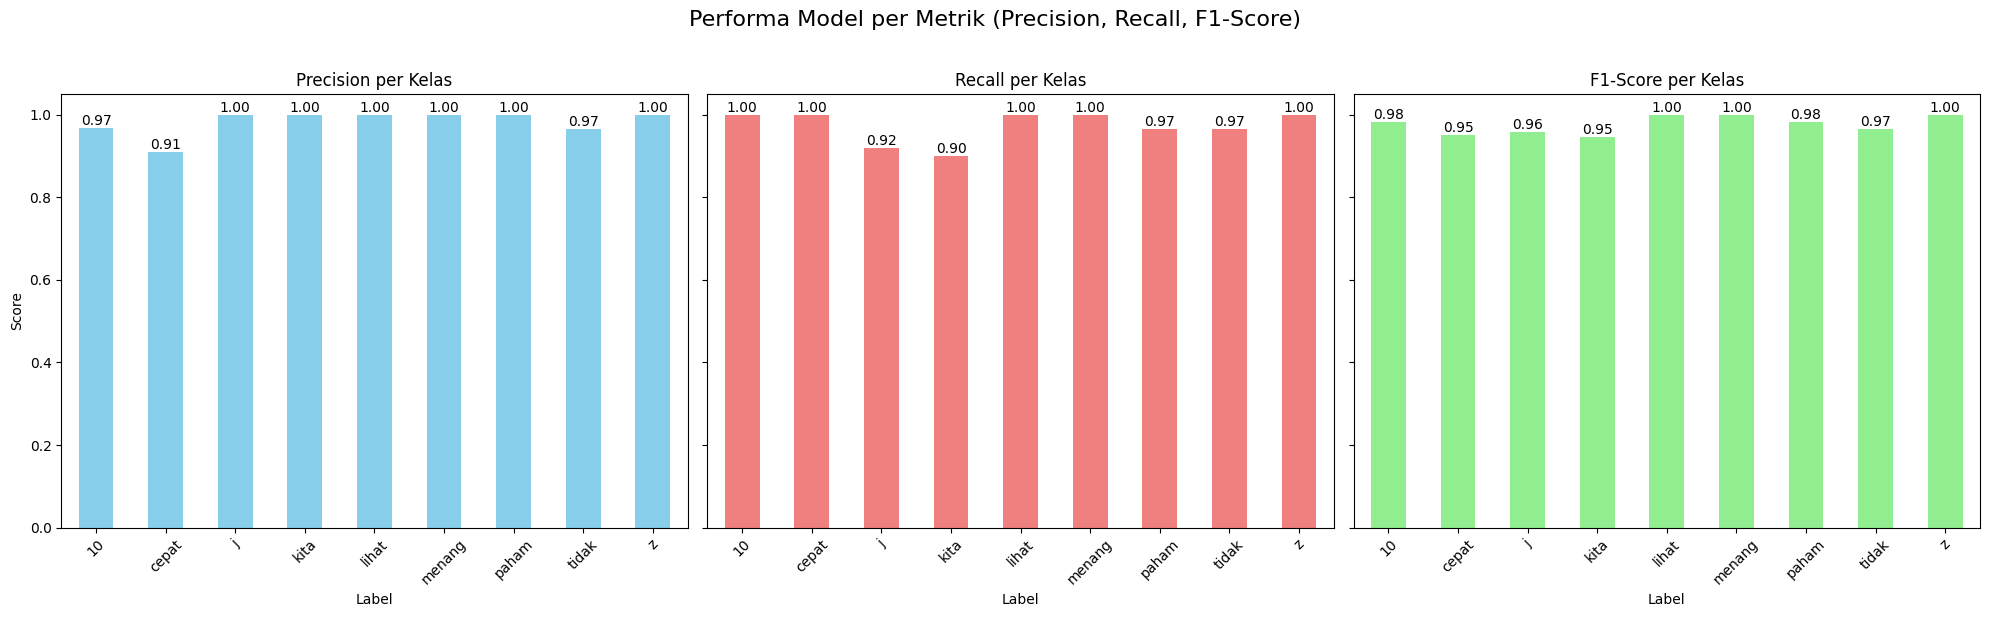

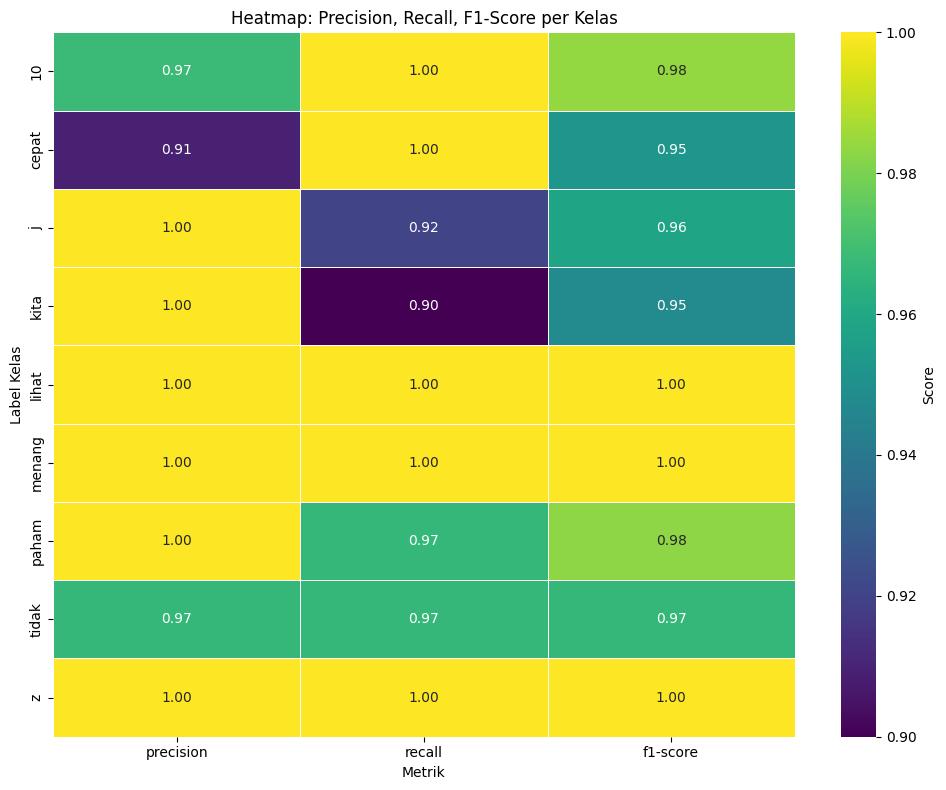

              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
          10       0.97      1.00      0.98        30
       cepat       0.91      1.00      0.95        30
           j       1.00      0.92      0.96        25
        kita       1.00      0.90      0.95        30
       lihat       1.00      1.00      1.00        30
      menang       1.00      1.00      1.00        30
       paham       1.00      0.97      0.98        30
       tidak       0.97      0.97      0.97        30
           z       1.00      1.00      1.00        30

    accuracy                           0.97       265
   macro avg       0.88      0.88      0.88       265
weighted avg       0.98      0.97      0.98       265


Analisis:
  - **Precision**: Seberapa banyak prediksi positif suatu kelas yang benar-benar positif.
  - **Recall**: Seberapa banyak label positif sebenarnya yang berhasil ditemukan model.
  - **F1-Score**: Rata-rata harmonik dari Precision 

<Figure size 1400x700 with 0 Axes>

In [72]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def evaluate_lstm_model_from_file(file_path="uji_realtime/uji_2.csv"):
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' tidak ditemukan. Pastikan file ada di path yang benar.")
        return

    try:
        df_lstm = pd.read_csv(file_path)

        if 'Predicted_Label' not in df_lstm.columns or 'Target_Label' not in df_lstm.columns:
            print("Error: File CSV harus memiliki kolom 'Predicted_Label' dan 'Target_Label'.")
            return

        # --- FIX START ---
        # Mengisi nilai NaN di 'Predicted_Label' dengan string kosong
        df_lstm['Predicted_Label'] = df_lstm['Predicted_Label'].fillna('')
        # --- FIX END ---

        print("--- Evaluasi Model LSTM (uji_2.csv) ---")
        print("\n--- Ringkasan Data ---")
        print(f"Total baris data: {len(df_lstm)}")
        print(f"Label prediksi unik: {df_lstm['Predicted_Label'].unique()}")
        print(f"Label target unik: {df_lstm['Target_Label'].unique()}")
        print("\nDistribusi Label Target:")
        print(df_lstm['Target_Label'].value_counts())

        y_true_lstm = df_lstm['Target_Label']
        y_pred_lstm = df_lstm['Predicted_Label']

        overall_accuracy_lstm = accuracy_score(y_true_lstm, y_pred_lstm)
        print(f"\n--- Akurasi Keseluruhan ---")
        print(f"Overall Accuracy: **{overall_accuracy_lstm:.4f}**")

        # Mengambil semua label unik dari prediksi dan target, lalu mengurutkannya
        all_labels_lstm = sorted(list(set(y_true_lstm).union(set(y_pred_lstm))))

        cm_lstm = confusion_matrix(y_true_lstm, y_pred_lstm, labels=all_labels_lstm)

        plt.figure(figsize=(12, 10))
        sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=all_labels_lstm, yticklabels=all_labels_lstm,
                    linewidths=.5, linecolor='gray', cbar=False)
        plt.xlabel('Label Prediksi')
        plt.ylabel('Label Sebenarnya')
        plt.title('Confusion Matrix for LSTM Model (uji_2.csv)')
        plt.tight_layout()
        plt.show()

        print("\n--- Confusion Matrix (Nilai Mentah) ---")
        print(cm_lstm)
        print("\nAnalisis: Diagonal utama menunjukkan prediksi yang benar. Nilai di luar diagonal adalah kesalahan.")
        print("Perhatikan label kosong `''` jika muncul. Ini menandakan prediksi yang tidak menghasilkan isyarat.")

        # --- Bagian Baru: Visualisasi Precision, Recall, F1-Score ---
        print("\n--- Metrik Per-Kelas (Classification Report) ---")
        class_report_dict = classification_report(y_true_lstm, y_pred_lstm, labels=all_labels_lstm, output_dict=True, zero_division=0)
        
        # Hapus 'accuracy', 'macro avg', 'weighted avg' dari dictionary untuk plot per kelas
        metrics_df = pd.DataFrame(class_report_dict).transpose()
        metrics_df = metrics_df.drop(columns=['support']) # 'support' usually not plotted on the same scale
        
        # Drop rows that are not individual classes (e.g., if there's no actual data for an empty string label)
        # Or if metrics are for aggregated averages
        individual_class_metrics = metrics_df[metrics_df.index.isin(y_true_lstm.unique())]
        
        # Plot Bar per Metrik
        metrics_to_plot = ['precision', 'recall', 'f1-score']
        fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True) # Share Y-axis for better comparison

        for i, metric in enumerate(metrics_to_plot):
            individual_class_metrics[metric].plot(kind='bar', ax=axes[i], color='skyblue' if metric == 'precision' else ('lightcoral' if metric == 'recall' else 'lightgreen'))
            axes[i].set_title(f'{metric.replace("_", " ").title()} per Kelas')
            axes[i].set_xlabel('Label')
            axes[i].set_ylabel('Score')
            axes[i].set_ylim(0, 1.05) # Ensure consistent Y-axis from 0 to 1
            axes[i].tick_params(axis='x', rotation=45)
            # Add value labels on top of bars
            for container in axes[i].containers:
                axes[i].bar_label(container, fmt='%.2f')

        plt.suptitle('Performa Model per Metrik (Precision, Recall, F1-Score)', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

        # Heatmap dari Classification Report
        # Buat DataFrame yang hanya berisi precision, recall, f1-score
        report_df_for_heatmap = individual_class_metrics[metrics_to_plot] # Use metrics_to_plot to ensure order

        plt.figure(figsize=(10, 8))
        sns.heatmap(report_df_for_heatmap, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Score'})
        plt.title('Heatmap: Precision, Recall, F1-Score per Kelas')
        plt.xlabel('Metrik')
        plt.ylabel('Label Kelas')
        plt.tight_layout()
        plt.show()

        print(classification_report(y_true_lstm, y_pred_lstm, labels=all_labels_lstm, zero_division=0)) # Print text report too
        print("\nAnalisis:")
        print("  - **Precision**: Seberapa banyak prediksi positif suatu kelas yang benar-benar positif.")
        print("  - **Recall**: Seberapa banyak label positif sebenarnya yang berhasil ditemukan model.")
        print("  - **F1-Score**: Rata-rata harmonik dari Precision dan Recall.")
        print("  - **Support**: Jumlah kemunculan label sebenarnya di data.")
        print("  - Perhatikan baris `''` (label kosong). Ini menunjukkan performa model dalam kasus tidak ada isyarat yang terdeteksi.")
                
        # ====================================================================
        # CATATAN TENTANG LOSS:
        # Loss adalah metrik yang dihitung selama FASE PELATIHAN (TRAINING) model,
        # bukan dari data hasil PREDIKSI (INFERENSI) seperti yang ada di uji_2.csv.
        # Anda tidak dapat menghitung Loss dari file CSV ini.
        # Loss akan terlihat di log atau output saat Anda melatih model LSTM Anda
        # (contoh: saat menggunakan model.fit() di TensorFlow/Keras).
        # ====================================================================
        print("\n--- Catatan Penting: Loss ---")
        print("Loss adalah metrik yang digunakan selama pelatihan model untuk mengukur seberapa baik model belajar.")
        print("Loss TIDAK dapat dihitung dari data 'uji_2.csv' karena file ini berisi hasil prediksi model yang sudah dilatih, bukan data pelatihan.")
        print("Untuk melihat nilai Loss, Anda perlu memeriksa log atau riwayat dari proses pelatihan model LSTM Anda sebelumnya.")

        df_lstm['Is_Correct'] = df_lstm['Predicted_Label'] == df_lstm['Target_Label']

        print("\n--- Analisis Confidence Score ---")
        print("Rata-rata Confidence untuk Prediksi Benar vs. Salah:")
        print(df_lstm.groupby('Is_Correct')['Confidence'].mean().rename({True: 'Benar', False: 'Salah'}))

        print("\nRata-rata Confidence per Label (Keseluruhan):")
        print(df_lstm.groupby('Target_Label')['Confidence'].mean().sort_index())

        plt.figure(figsize=(14, 7))
        sns.histplot(data=df_lstm, x='Confidence', hue='Is_Correct', kde=True, bins=20, palette={'True': 'skyblue', 'False': 'salmon'})
        plt.title('Distribusi Confidence Score untuk Prediksi Benar vs. Salah (LSTM)')
        plt.xlabel('Confidence Score')
        plt.ylabel('Jumlah Prediksi')
        plt.show()

        plt.figure(figsize=(14, 7))
        sns.boxplot(data=df_lstm, x='Target_Label', y='Confidence', hue='Is_Correct', palette={'True': 'skyblue', 'False': 'salmon'})
        plt.title('Distribusi Confidence Score per Label (Benar vs. Salah) (LSTM)')
        plt.xlabel('Target Label')
        plt.ylabel('Confidence Score')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' kosong. Tidak ada data untuk dianalisis.")
    except Exception as e:
        print(f"Terjadi kesalahan saat membaca atau menganalisis CSV: {e}. Pastikan format data konsisten di kolom yang sama.")

if __name__ == "__main__":
    evaluate_lstm_model_from_file()

## FILE AND FOLDER EXPLAINED

1. **Data Raw**  
   Lokasi: `csv/static/raw.csv`  
   File ini berisi data landmark mentah yang belum diproses. Setiap baris dalam file ini berisi koordinat landmark yang diperoleh dari input video.

2. **Data Filter**  
   Lokasi: `csv/static/filter.csv`  
   File ini berisi data landmark yang telah difilter untuk menghapus noise dan data yang tidak relevan. Di dalam folder ini, terdapat sublist file yang relevan:
   
   - **`filter_v1.csv`**  
     File ini berisi hasil filter versi 1 yang diterapkan untuk data landmark. Ini mencakup **penghapusan nilai ekstrem dan koreksi posisi yang tidak valid.**
   
   - **`filter_v2.csv`**  
     Versi kedua dari file filter ini mencakup **penghapusan nilai ekstrem dan koreksi posisi yang tidak valid.**
3. **Data Label Terpisah (Separated)**  
   Lokasi: `csv_separated/static/{target}/pure.csv`  
   File ini berisi data landmark mentah yang belum diproses. Setiap baris dalam file ini berisi koordinat landmark yang diperoleh dari input video.
   
[Daftar Isi](#Daftar-Isi)